# Predicting Individual Savings Potential: A Regression Model of Financial Behavior

## Introduction

### Project Overview
This project aims to analyze age, education, and financial data to predict individual savings potential. Understanding how these demographic and financial factors influence savings behavior is crucial for tailoring personalized financial products, optimizing marketing strategies, and ultimately enhancing business profitability.

### Background
The dataset used in this project consists of consumer financial data collected throughout 2022. It provides insights into several factors that may influence individual savings amounts, including age, education level, and financial literacy. By analyzing these variables, the project seeks to uncover patterns and relationships that drive personal savings behavior.

### Objectives
- **Segment Individuals:** Identify and categorize individuals based on their financial behavior to uncover distinct patterns and trends.
- **Analyze Key Factors:** Determine the most significant factors that impact personal savings.
- **Predict Savings Potential:** Develop a predictive model to estimate individual savings potential using the identified factors and relevant economic indicators.

### Data Description

#### Dataset Overview
The dataset for this project is sourced from the **Federal Reserve's Survey of Consumer Finances**. It consists of **22,975 individuals** and **5,473 features**, offering a comprehensive view of personal finances and economic behavior.

#### Key Features
Below are some of the key features used in this analysis:

- **Roth IRA balance (x6551):** The total balance in an individual’s Roth IRA account.
- **Savings account balance (x3730):** The amount of money held in an individual’s savings account.
- **Age of individual (x8022):** The age of the individual respondent.
- **Total education loan borrowed (x7805):** The total amount of student loans taken by an individual.
- **Highest level of educational attainment (x5931):** The highest level of education an individual has completed.
- **Current checking account balance (x3506):** The amount of money in an individual’s checking account.
- **Total brokerage account balance of family (x3930):** The total balance in the family’s brokerage accounts.
- **Typical year income (x7362):** The average annual income an individual typically earns.
- **Years in college (x5933):** The number of years an individual has spent in higher education.

#### Data Types
- **Categorical:** `x5931` (Highest level of educational attainment)
- **Numerical:** All other listed features

### Prediction
The goal of this project is to develop a model that predicts each individual’s **savings potential** based on the provided features, such as age, education, income, and various financial account balances. By leveraging these key factors, the model aims to estimate how much an individual is likely to save, helping to better understand financial behavior and inform future financial decisions.

### Metric
**Mean Absolute Percentage Error (MAPE):** This metric calculates the average of the absolute differences between the predicted and actual values, expressed as a percentage of the actual values.

MAPE provides an intuitive way to assess the accuracy of predictions, as it expresses errors in relative terms, making it easier to interpret how far off predictions are from the true savings amounts.

### References
1. Dataset Source: [Federal Reserve's Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm)
2. Fernández-Villaverde, J., & Krueger, D. (2001). *Consumption and Saving over the Life Cycle: How Important are Consumer Durables?* University of Minnesota and Federal Reserve Bank of Minneapolis. [Link](https://www.sas.upenn.edu/~jesusfv/durableslc.pdf)
3. Fagereng, A., Holm, M. B., Moll, B., & Natvik, G. (2019). *Saving Behavior Across the Wealth Distribution: The Importance of Capital Gains.* National Bureau of Economic Research, Working Paper 26588. [Link](https://www.nber.org/system/files/working_papers/w26588/w26588.pdf)
4. Mahdzan, N., & Tabiani, S. (2013). *The Impact of Financial Literacy on Individual Saving: An Exploratory Study in the Malaysian Context*. Transformations in Business and Economics, 12, 41-55. [Link](https://www.researchgate.net/profile/Nurul-Mahdzan/publication/275056695_The_Impact_of_Financial_Literacy_on_Individual_Saving_An_Exploratory_Study_in_the_Malaysian_Context/links/553202fd0cf27acb0deaaff9/The-Impact-of-Financial-Literacy-on-Individual-Saving-An-Exploratory-Study-in-the-Malaysian-Context.pdf)

---

## Exploratory Data Analysis

In [1]:
# import basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Understanding the Dataset

In [2]:
data = pd.read_stata('p22i6.dta')

In [3]:
data.head()

j7398  j7578  j7579  j7019  j7020  j7001  j7050  j8020  j8021  j5908  \
0      0      0      0      8      8      8      0      0      0      0   
1      0      0      0      8      8      8      0      0      0      0   
2      0      0      0      8      8      8      0      0      0      0   
3      0      0      0      8      8      8      0      0      0      0   
4      0      0      0      8      8      8      0      0      0      0   

   j7005  j8022  j8023  j8024  j7000  j7021  j7002  j102  j103  j104  j105  \
0      0      0      0      8      1      1      0     1     1     1     1   
1      0      0      0      8      1      1      0     1     1     1     1   
2      0      0      0      8      1      1      0     1     1     1     1   
3      0      0      0      8      1      1      0     1     1     1     1   
4      0      0      0      8      1      1      0     1     1     1     1   

   j106  j107  j108  j110  j7006  j111  j112  j113  j114  j116  j7007  j117  \
0     1     1     0     0      0     0     0     0     5     0      0     0   
1     1     1     0     0      0     0     0     0     5     0      0     0   
2     1     1     0     0      0     0     0     0     5     0      0     0   
3     1     1     0     0      0     0     0     0     5     0      0     0   
4     1     1     0     0      0     0     0     0     5     0      0     0   

   j118  j119  j120  j122  j7008  j123  j124  j125  j126  j128  j7009  j129  \
0     0     0     0     0      0     1     1     0     0     0      0     1   
1     0     0     0     0      0     1     1     0     0     0      0     1   
2     0     0     0     0      0     1     1     0     0     0      0     1   
3     0     0     0     0      0     1     1     0     0     0      0     1   
4     0     0     0     0      0     1     1     0     0     0      0     1   

   j130  j131  j132  j134  j7010  j135  j136  j137  j202  j204  j7011  j205  \
0     1     0     1     1      1     1     1     1     1     1      1     1   
1     1     0     1     1      1     1     1     1     1     1      1     1   
2     1     0     1     1      1     1     1     1     1     1      1     1   
3     1     0     1     1      1     1     1     1     1     1      1     1   
4     1     0     1     1      1     1     1     1     1     1      1     1   

   j206  j207  j208  j210  j7012  j211  j212  j213  j214  j216  j7013  j217  \
0     1     1     1     1      1     1     1     1     1     1      1     1   
1     1     1     1     1      1     1     1     1     1     1      1     1   
2     1     1     1     1      1     1     1     1     1     1      1     1   
3     1     1     1     1      1     1     1     1     1     1      1     1   
4     1     1     1     1      1     1     1     1     1     1      1     1   

   j218  j219  j220  j222  j7014  j223  j224  j225  j226  j228  j7035  j229  \
0     1     1     1     1      1     1     1     1     1     1      1     1   
1     1     1     1     1      1     1     1     1     1     1      1     1   
2     1     1     1     1      1     1     1     1     1     1      1     1   
3     1     1     1     1      1     1     1     1     1     1      1     1   
4     1     1     1     1      1     1     1     1     1     1      1     1   

   j230  j231  j19000  j19001  j19002  j19003  j19004  j19005  j19006  j19007  \
0     1     1       0       1       1       1       1       1       1       1   
1     1     1       0       1       1       1       1       1       1       1   
2     1     1       0       1       1       1       1       1       1       1   
3     1     1       0       1       1       1       1       1       1       1   
4     1     1       0       1       1       1       1       1       1       1   

   j19008  j19009  j19010  j19011  j19012  j19013  j19014  j19015  j19016  \
0       1       1       1       1       1       1       1       1       1   
1       1       1       1       1       1       1       1       1  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Columns: 5473 entries, j7398 to x11572
dtypes: float32(245), float64(103), int16(2620), int32(368), int8(2137)
memory usage: 233.4 MB


### Data Cleaning

In [5]:
# any duplicates?

data = data.drop_duplicates()

In [6]:
# select features

data = data[['x6551', 'x3730', 'x8022', 'x7805', 'x5931', 'x3506', 'x3930', 'x7362', 'x5933']]

In [7]:
# rename columns

data = data.rename(columns={
                    "x6551": "Roth IRA balance",
                    "x3730": "Savings account balance",
                    "x8022": "Age of individual",
                    "x7805": "Total education loan borrowed",
                    "x5931": "Highest level of educational attainment",
                    "x3506": "Current checking account balance",
                    "x3930": "Total brokerage account balance of family",
                    "x7362": "Typical year income",
                    "x5933": "Years in college"
                })

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Roth IRA balance                           22975 non-null  int32
 1   Savings account balance                    22975 non-null  int32
 2   Age of individual                          22975 non-null  int8 
 3   Total education loan borrowed              22975 non-null  int32
 4   Highest level of educational attainment    22975 non-null  int8 
 5   Current checking account balance           22975 non-null  int32
 6   Total brokerage account balance of family  22975 non-null  int32
 7   Typical year income                        22975 non-null  int32
 8   Years in college                           22975 non-null  int8 
dtypes: int32(6), int8(3)
memory usage: 605.9 KB


In [9]:
data.describe()

,Roth IRA balance,Savings account balance,Age of individual,Total education loan borrowed,Highest level of educational attainment,Current checking account balance,Total brokerage account balance of family,Typical year income,Years in college
count,2.297500e+04,2.297500e+04,22975.000000,22975.000000,22975.000000,2.297500e+04,2.297500e+04,2.297500e+04,22975.000000
mean,1.208784e+05,3.313193e+05,54.468988,8542.488357,10.328400,9.072182e+04,1.535448e+05,3.837768e+05,0.334755
std,2.672563e+06,5.941817e+06,16.189081,30657.411680,2.815743,1.014954e+06,2.509599e+06,4.235035e+06,0.962842
min,-1.000000e+00,-1.000000e+00,18.000000,0.000000,-1.000000,-3.000000e+02,-1.000000e+00,-9.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,42.000000,0.000000,8.000000,7.000000e+02,0.000000e+00,0.000000e+00,0.000000
50%,0.000000e+00,2.000000e+02,56.000000,0.000000,11.000000,3.500000e+03,0.000000e+00,0.000000e+00,0.000000
75%,0.000000e+00,1.800000e+04,67.000000,0.000000,12.000000,1.600000e+04,0.000000e+00,4.000000e+04,0.000000
max,1.626700e+08,2.600000e+08,95.000000,474000.000000,14.000000,4.553000e+07,1.000000e+08,1.712300e+08,5.000000


### Feature Engineering

In [10]:
# remove illegal values

data = data[data['Roth IRA balance'] > 0]
data = data[data['Savings account balance'] > 0]
data = data[data['Current checking account balance'] >= 0]
data = data[data['Total brokerage account balance of family'] >= 0]

In [11]:
# add 'Roth IRA balance' and 'Savings account balance' for encompassing

data['Total Savings'] = data['Roth IRA balance'] + data['Savings account balance']

# remove 'Roth IRA balance' and 'Savings account balance'

data = data.drop(['Roth IRA balance', 'Savings account balance'], axis=1)

In [12]:
data.head()

,Age of individual,Total education loan borrowed,Highest level of educational attainment,Current checking account balance,Total brokerage account balance of family,Typical year income,Years in college,Total Savings
10,68,0,14,570,0,0,0,209010
11,68,0,14,570,0,0,0,210010
12,68,0,14,570,0,0,0,196010
13,68,0,14,560,0,0,0,196010
14,68,0,14,570,0,0,0,203010


In [13]:
data.describe()

,Age of individual,Total education loan borrowed,Highest level of educational attainment,Current checking account balance,Total brokerage account balance of family,Typical year income,Years in college,Total Savings
count,2566.000000,2566.000000,2566.000000,2.566000e+03,2.566000e+03,2.566000e+03,2566.000000,2.566000e+03
mean,52.962588,9423.928293,12.054560,8.514495e+04,3.217124e+05,7.131056e+05,0.186282,2.050068e+06
std,14.517938,30058.704167,1.673828,3.779800e+05,4.556821e+06,7.473193e+06,0.793482,2.193929e+07
min,21.000000,0.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9.000000e+01
25%,42.000000,0.000000,12.000000,4.000000e+03,0.000000e+00,0.000000e+00,0.000000,4.180000e+04
50%,53.000000,0.000000,12.000000,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,1.250000e+05
75%,64.000000,0.000000,13.000000,4.000000e+04,0.000000e+00,8.700000e+04,0.000000,3.300000e+05
max,87.000000,250000.000000,14.000000,6.460000e+06,1.000000e+08,1.712300e+08,5.000000,4.226700e+08


In [14]:
# remove top and bottom 5% from columns: 'Total education loan borrowed', 'Current checking account balance', 'Total brokerage account balance of family', 
#                                        'Typical year income', 'Total Savings'

from feature_engine.outliers import Winsorizer

data_winsorized = Winsorizer(capping_method='quantiles', tail='right', fold=0.05, variables=
                             ['Total education loan borrowed', 'Current checking account balance', 
                              'Typical year income', 'Total Savings']).fit_transform(data)

In [15]:
data_winsorized.describe()

,Age of individual,Total education loan borrowed,Highest level of educational attainment,Current checking account balance,Total brokerage account balance of family,Typical year income,Years in college,Total Savings
count,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2.566000e+03,2566.000000,2.566000e+03
mean,52.962588,6576.695246,12.054560,42621.667966,3.217124e+05,1.684281e+05,0.186282,3.691929e+05
std,14.517938,17097.837561,1.673828,73465.414627,4.556821e+06,4.082549e+05,0.793482,6.192998e+05
min,21.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,9.000000e+01
25%,42.000000,0.000000,12.000000,4000.000000,0.000000e+00,0.000000e+00,0.000000,4.180000e+04
50%,53.000000,0.000000,12.000000,10000.000000,0.000000e+00,0.000000e+00,0.000000,1.250000e+05
75%,64.000000,0.000000,13.000000,40000.000000,0.000000e+00,8.700000e+04,0.000000,3.300000e+05
max,87.000000,62000.000000,14.000000,285250.000000,1.000000e+08,1.617500e+06,5.000000,2.465250e+06


In [16]:
# log1p columns: 'Total education loan borrowed', 'Current checking account balance', 'Total brokerage account balance of family', 
#                 'Typical year income', 'Total Savings'

for col in ['Total education loan borrowed', 'Current checking account balance', 'Total brokerage account balance of family', 'Typical year income', 'Total Savings']:
    data_winsorized[f'log1p({col})'] = np.log1p(data_winsorized[col])
    data_winsorized = data_winsorized.drop(col, axis=1)

In [17]:
# add square columns: "Total education loan borrowed", "Total brokerage account balance of family", "Typical year income"

for col in ['log1p(Total education loan borrowed)', 'log1p(Total brokerage account balance of family)', 'log1p(Typical year income)']:
    data_winsorized[f'({col})^2'] = data_winsorized[col]**2

In [18]:
data_winsorized.head()

,Age of individual,Highest level of educational attainment,Years in college,log1p(Total education loan borrowed),log1p(Current checking account balance),log1p(Total brokerage account balance of family),log1p(Typical year income),log1p(Total Savings),(log1p(Total education loan borrowed))^2,(log1p(Total brokerage account balance of family))^2,(log1p(Typical year income))^2
10,68,14,0,0.0,6.347389,0.0,0.0,12.250142,0.0,0.0,0.0
11,68,14,0,0.0,6.347389,0.0,0.0,12.254915,0.0,0.0,0.0
12,68,14,0,0.0,6.347389,0.0,0.0,12.185926,0.0,0.0,0.0
13,68,14,0,0.0,6.329721,0.0,0.0,12.185926,0.0,0.0,0.0
14,68,14,0,0.0,6.347389,0.0,0.0,12.221015,0.0,0.0,0.0


In [19]:
data_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2566 entries, 10 to 22929
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age of individual                                     2566 non-null   int8   
 1   Highest level of educational attainment               2566 non-null   int8   
 2   Years in college                                      2566 non-null   int8   
 3   log1p(Total education loan borrowed)                  2566 non-null   float64
 4   log1p(Current checking account balance)               2566 non-null   float64
 5   log1p(Total brokerage account balance of family)      2566 non-null   float64
 6   log1p(Typical year income)                            2566 non-null   float64
 7   log1p(Total Savings)                                  2566 non-null   float64
 8   (log1p(Total education loan borrowed))^2              2566 no

In [20]:
data_winsorized.describe()

,Age of individual,Highest level of educational attainment,Years in college,log1p(Total education loan borrowed),log1p(Current checking account balance),log1p(Total brokerage account balance of family),log1p(Typical year income),log1p(Total Savings),(log1p(Total education loan borrowed))^2,(log1p(Total brokerage account balance of family))^2,(log1p(Typical year income))^2
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,52.962588,12.054560,0.186282,1.712051,9.368695,1.263071,3.946178,11.700748,17.792778,15.087666,49.865651
std,14.517938,1.673828,0.793482,3.855834,1.755853,3.673905,5.857192,1.609623,40.524060,47.602761,75.505202
min,21.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.510860,0.000000,0.000000,0.000000
25%,42.000000,12.000000,0.000000,0.000000,8.294300,0.000000,0.000000,10.640676,0.000000,0.000000,0.000000
50%,53.000000,12.000000,0.000000,0.000000,9.210440,0.000000,0.000000,11.736077,0.000000,0.000000,0.000000
75%,64.000000,13.000000,0.000000,0.000000,10.596660,0.000000,11.373675,12.706851,0.000000,0.000000,129.360481
max,87.000000,14.000000,5.000000,11.034906,12.561125,18.420681,14.296393,14.717804,121.769146,339.321479,204.386851


In [21]:
# get column names
data_winsorized.columns

Index(['Age of individual', 'Highest level of educational attainment',
       'Years in college', 'log1p(Total education loan borrowed)',
       'log1p(Current checking account balance)',
       'log1p(Total brokerage account balance of family)',
       'log1p(Typical year income)', 'log1p(Total Savings)',
       '(log1p(Total education loan borrowed))^2',
       '(log1p(Total brokerage account balance of family))^2',
       '(log1p(Typical year income))^2'],
      dtype='object')

### Data Visualization

/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)                



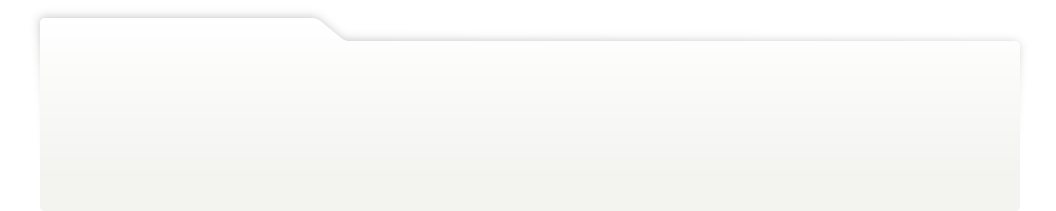
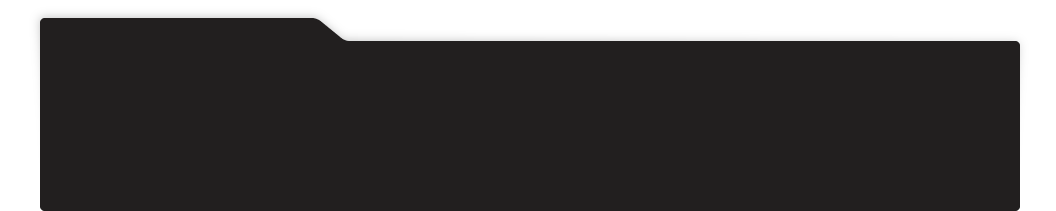
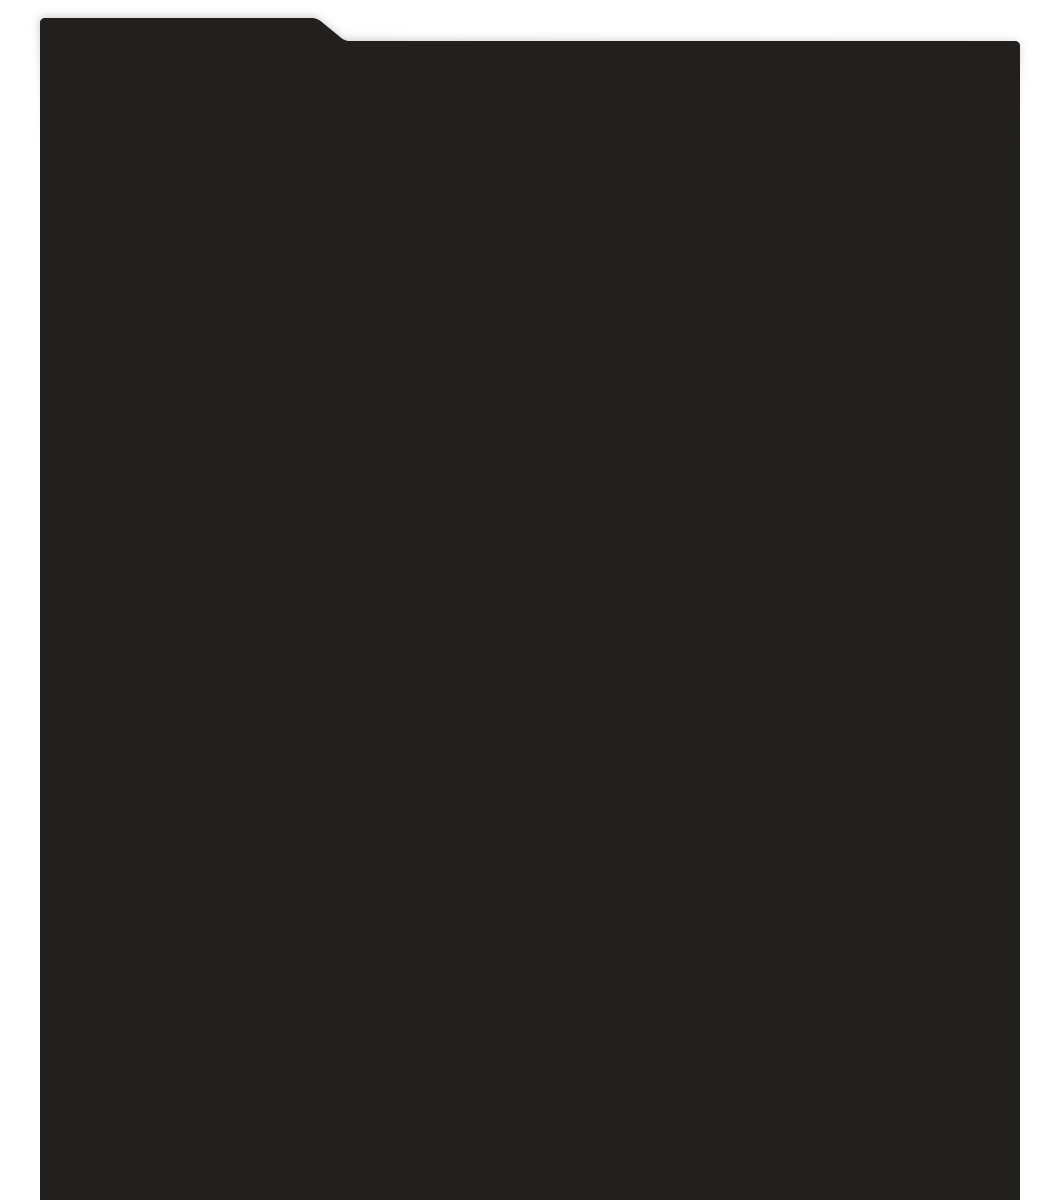
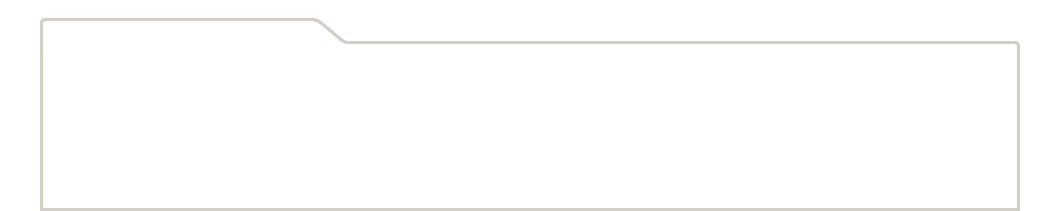
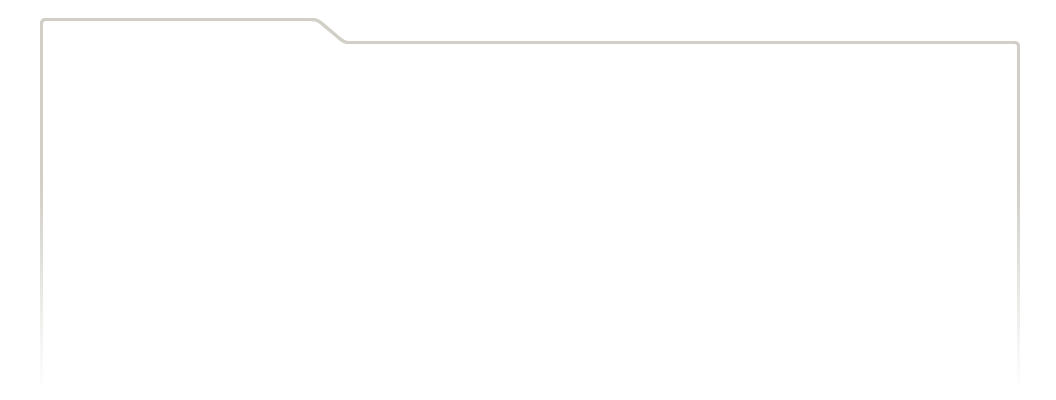
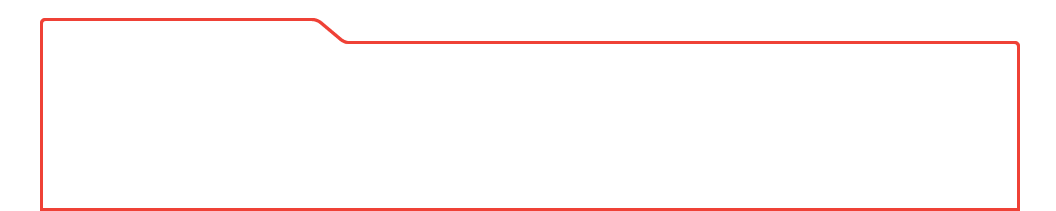
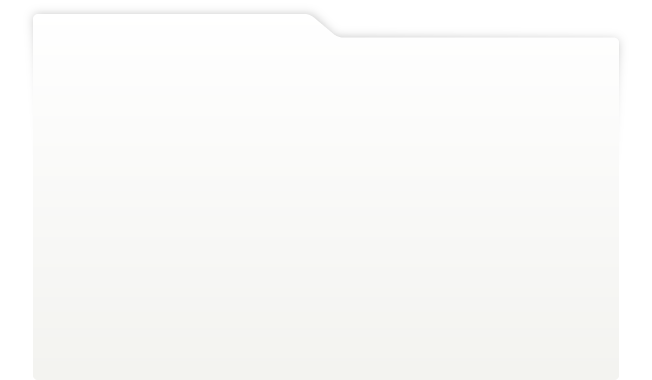
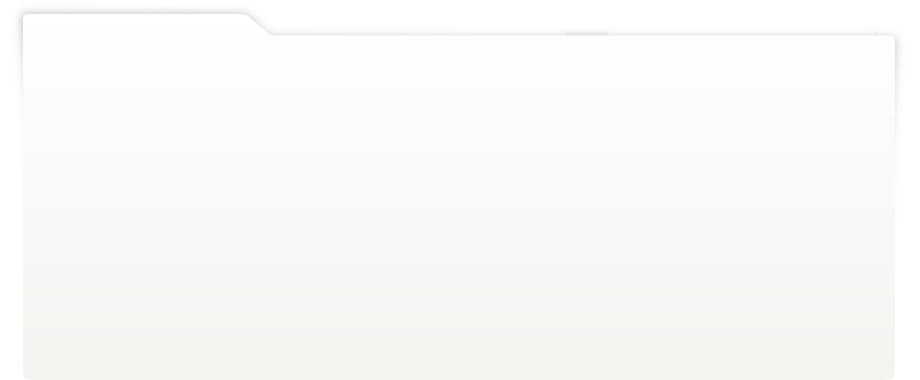
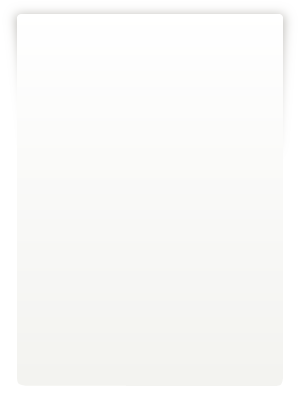
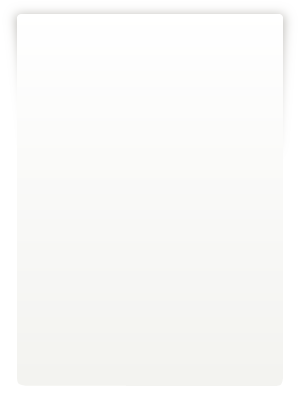
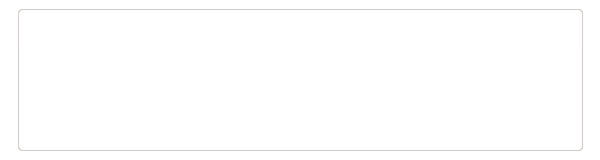
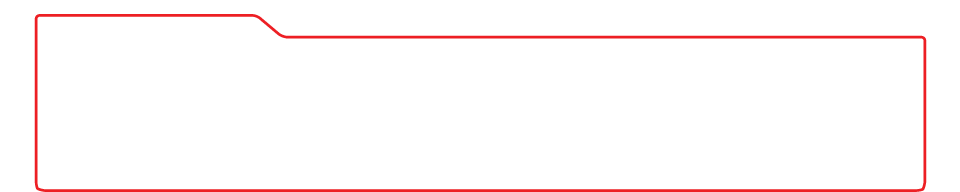
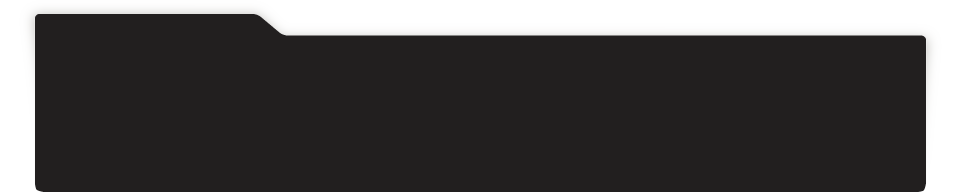
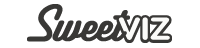
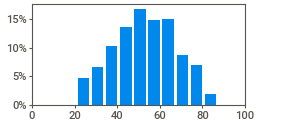
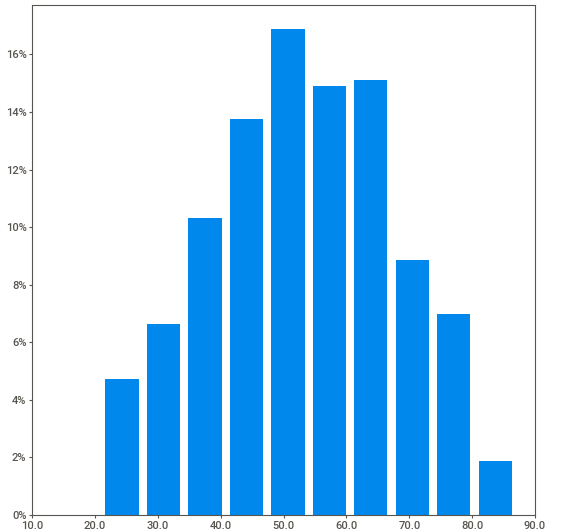
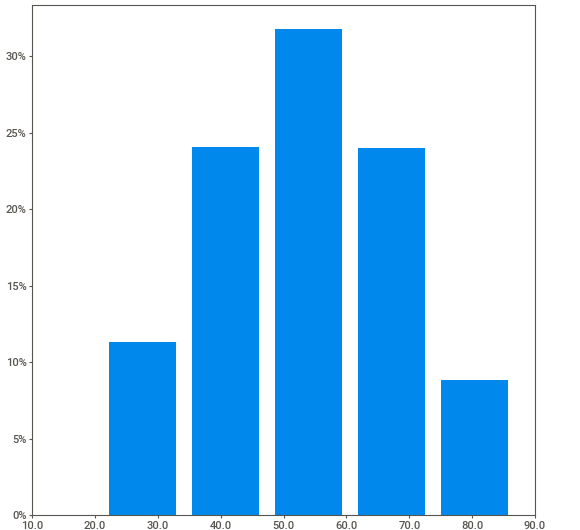
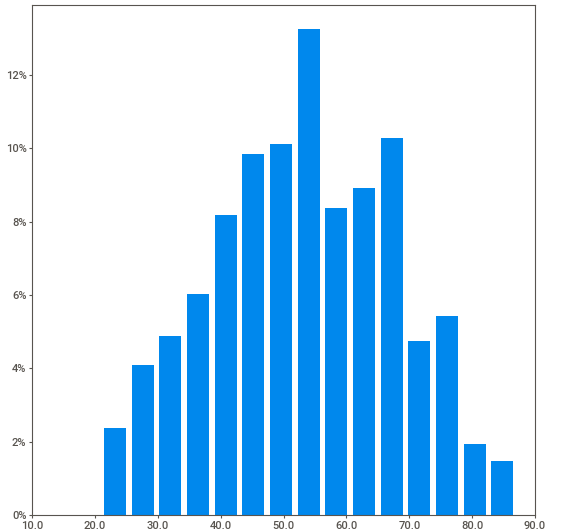
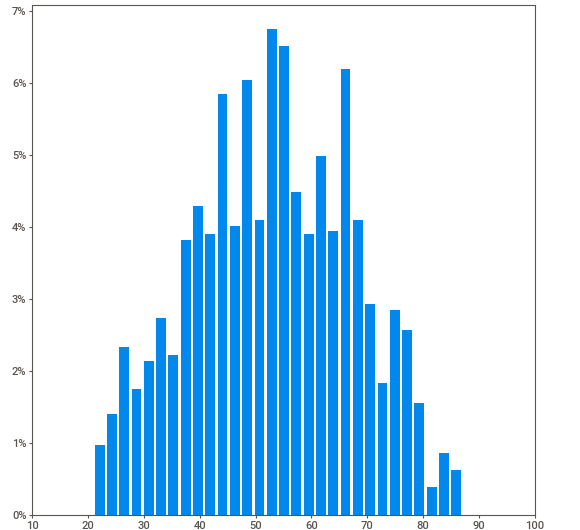
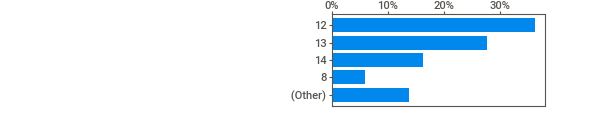
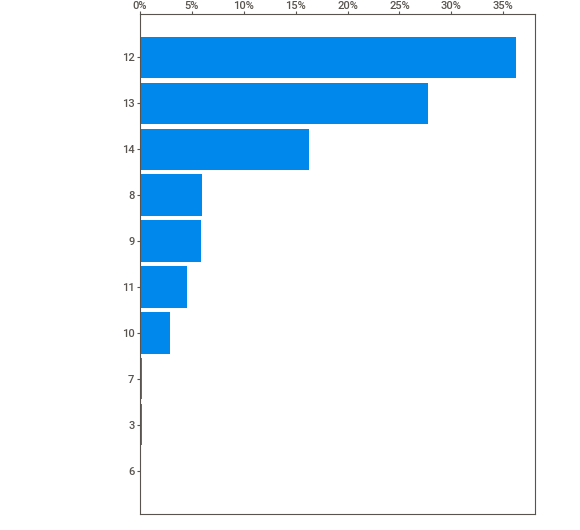
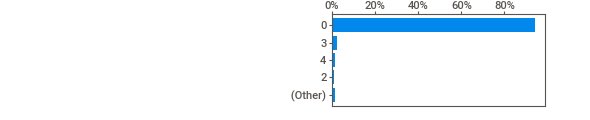
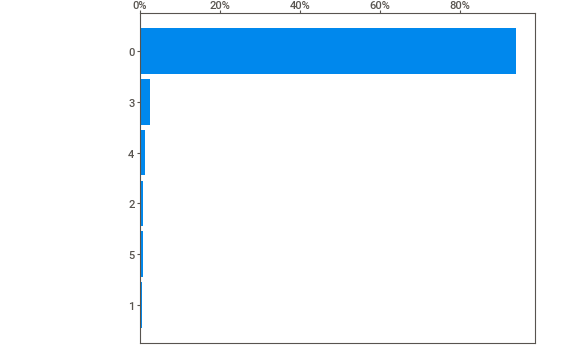
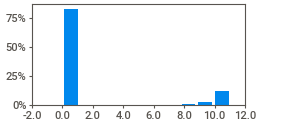
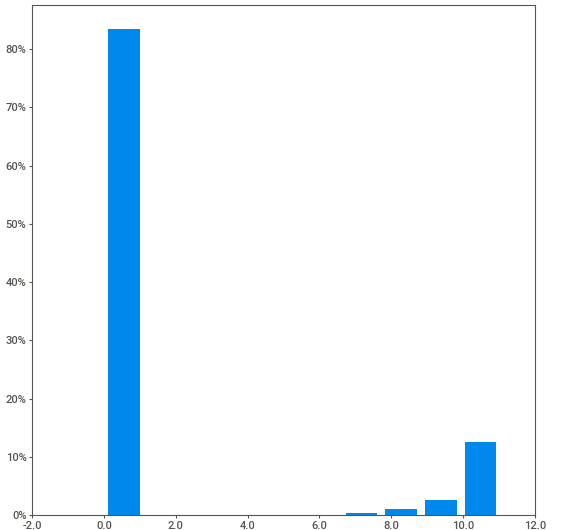
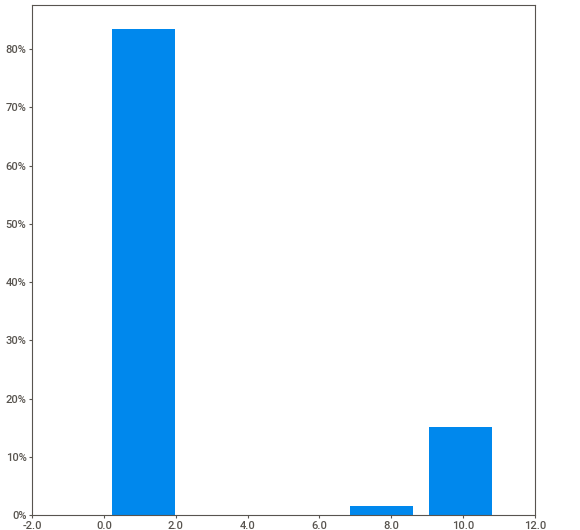
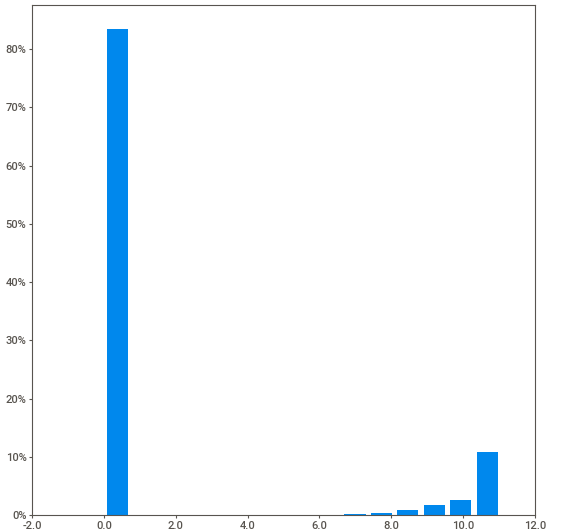
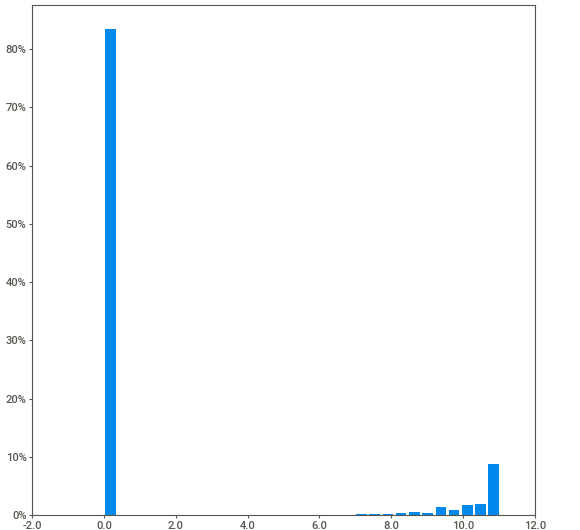
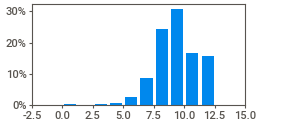
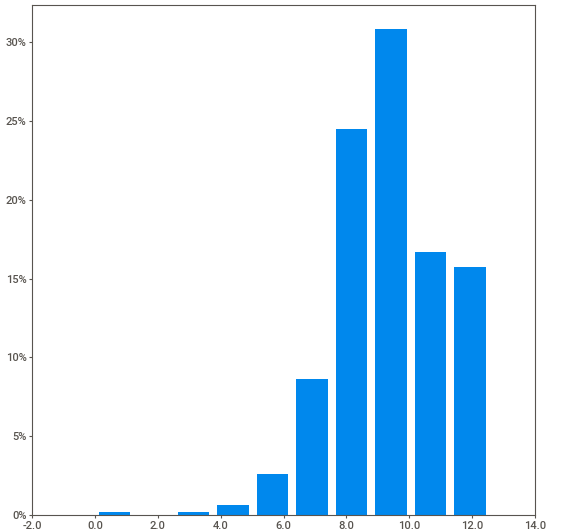
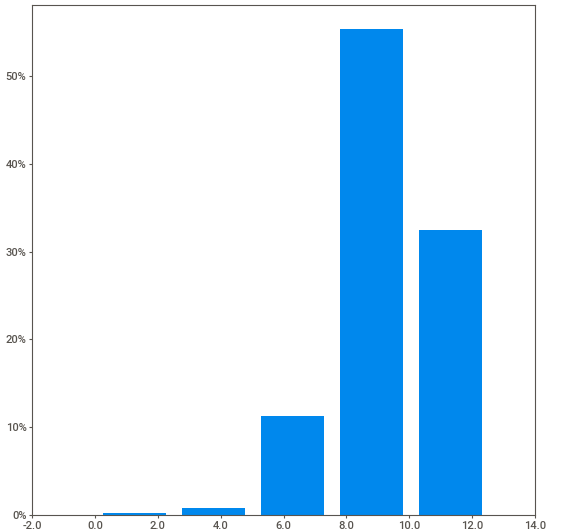
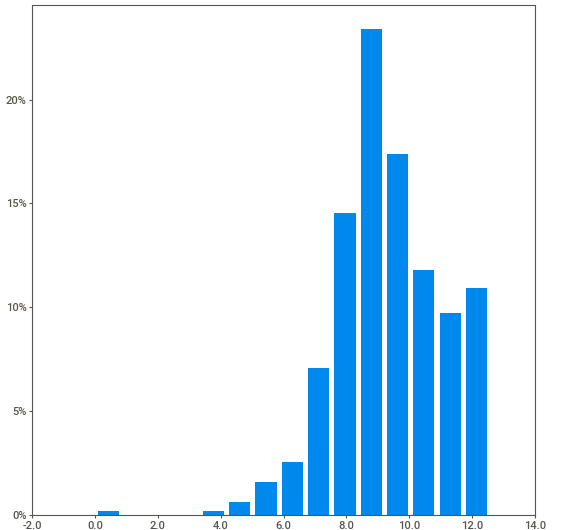
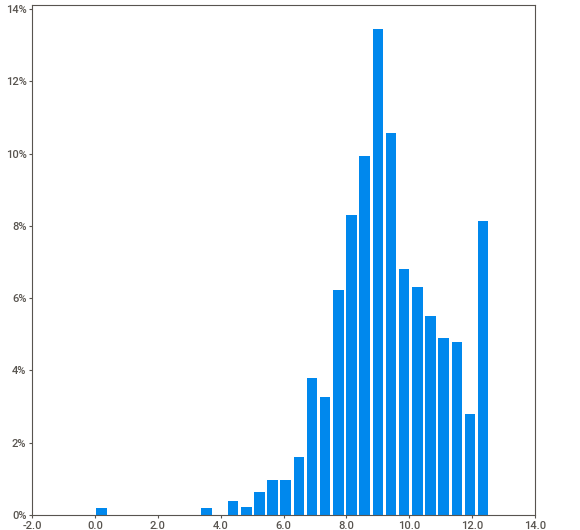
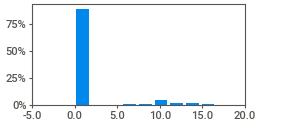
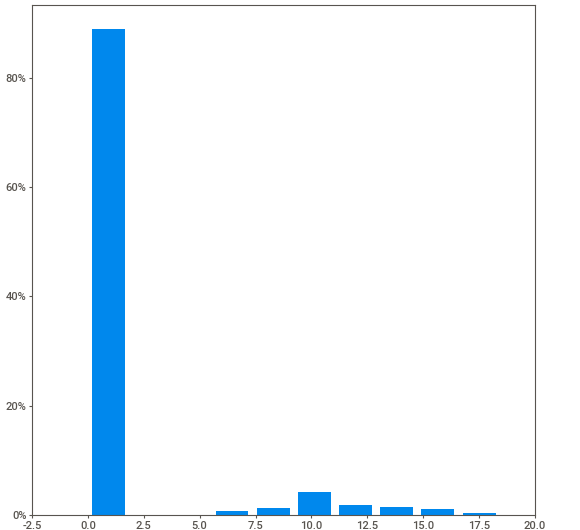
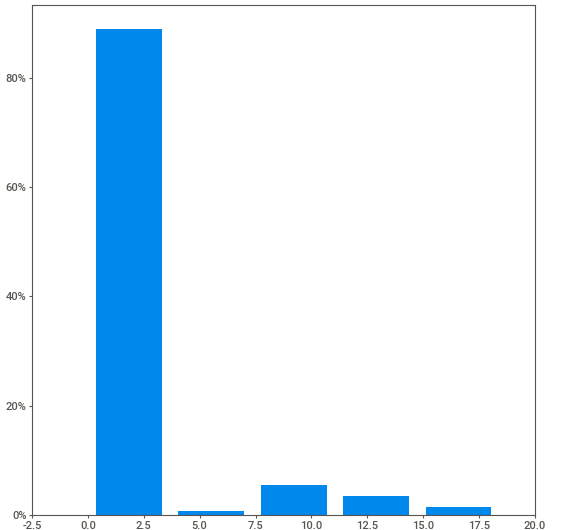
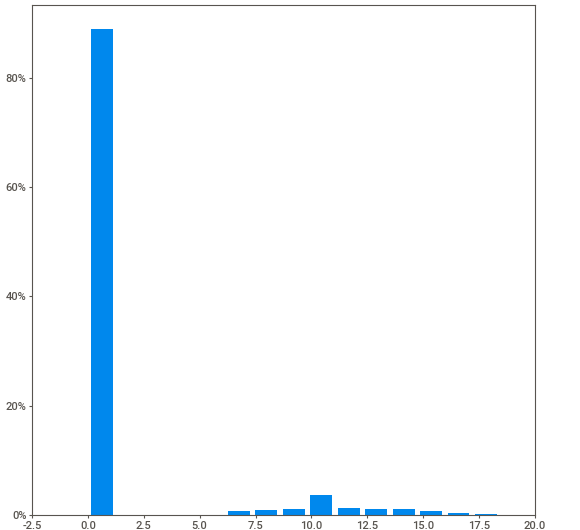
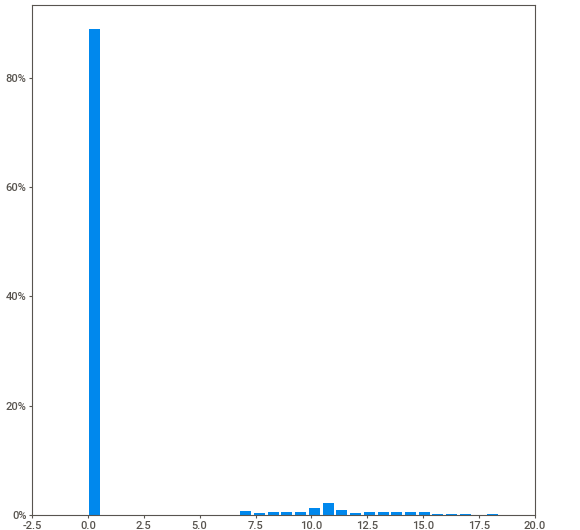
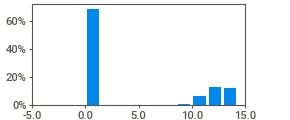
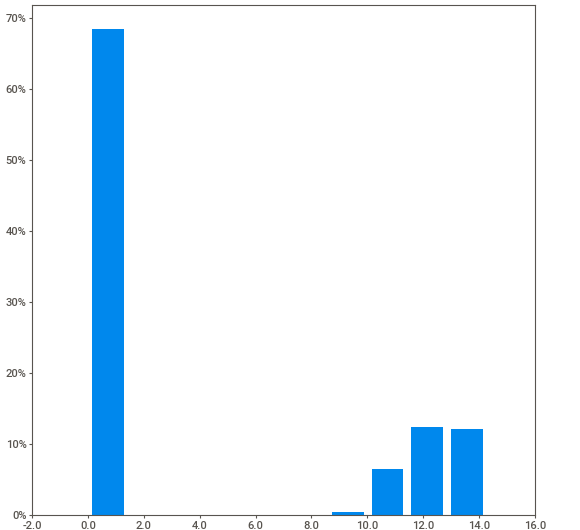
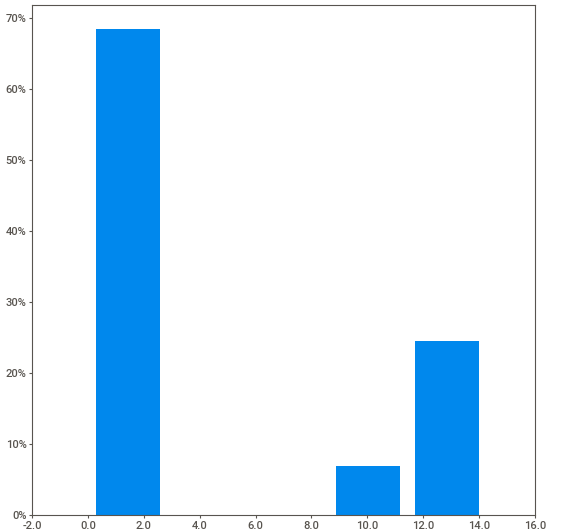
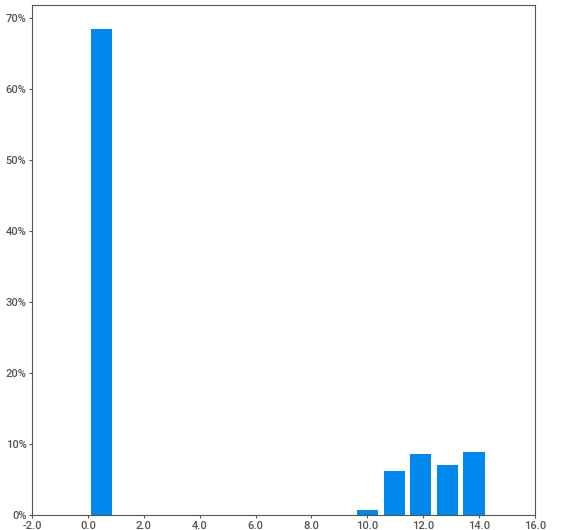
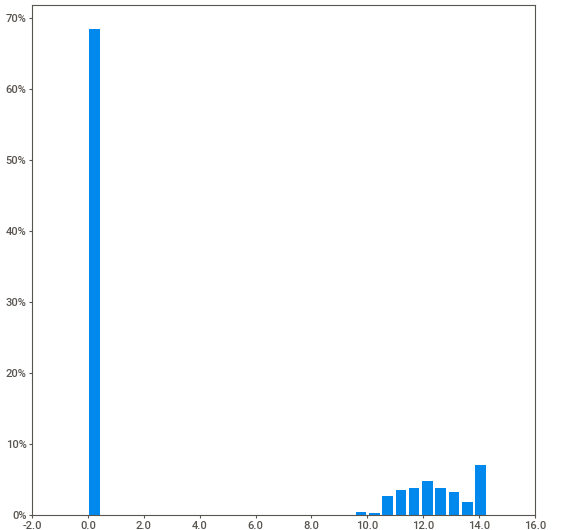
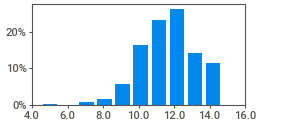
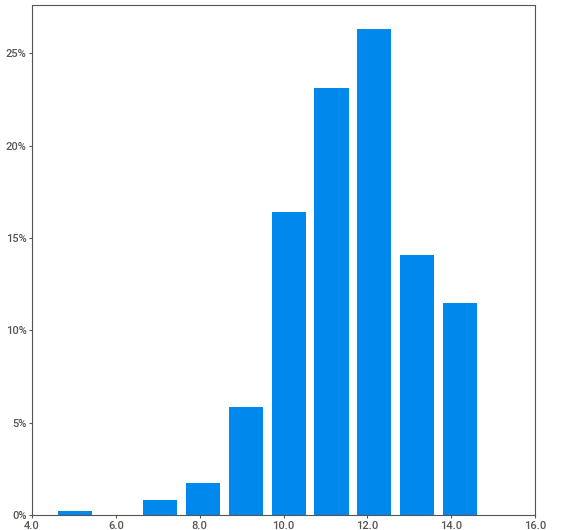
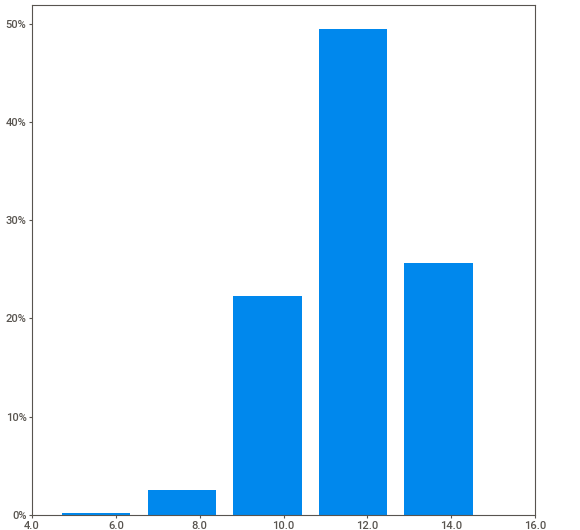
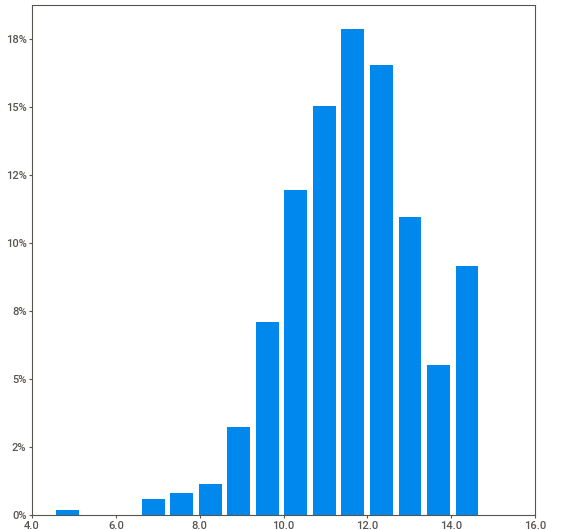
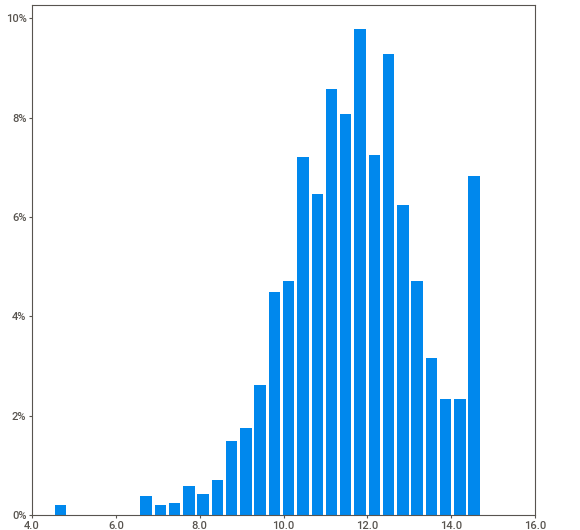
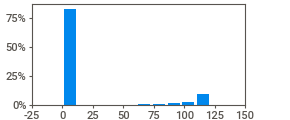
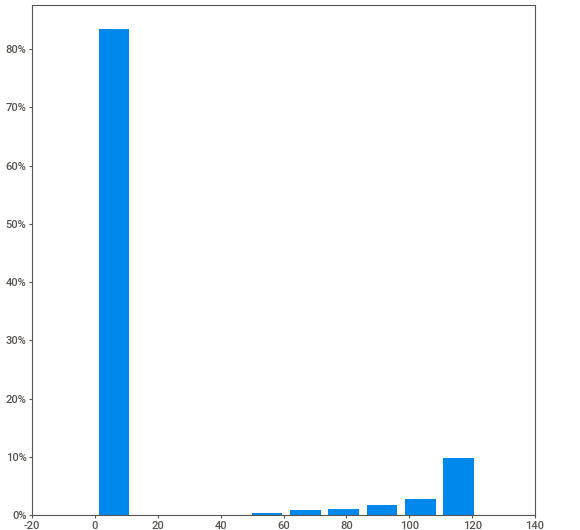
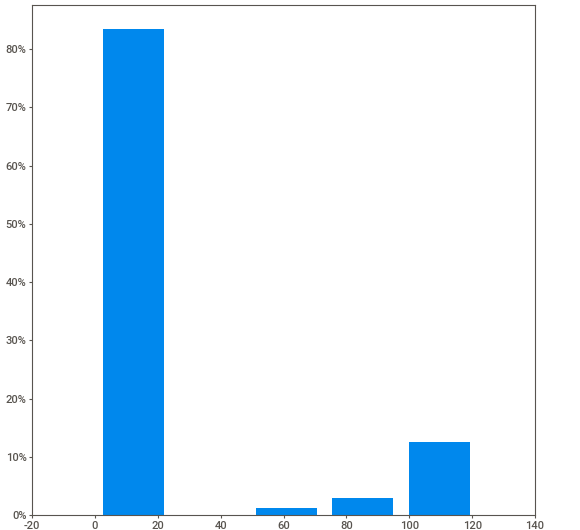
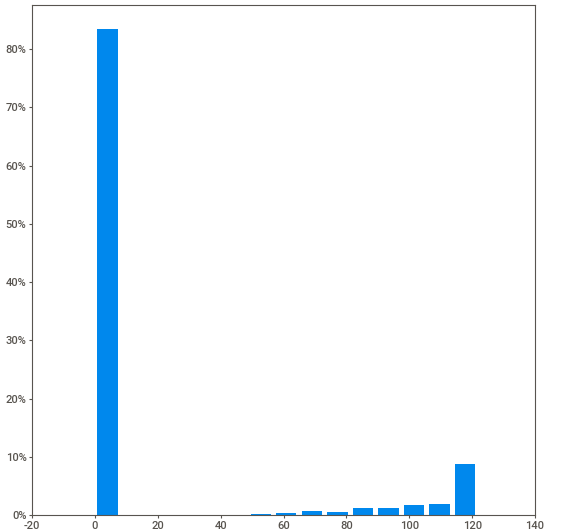
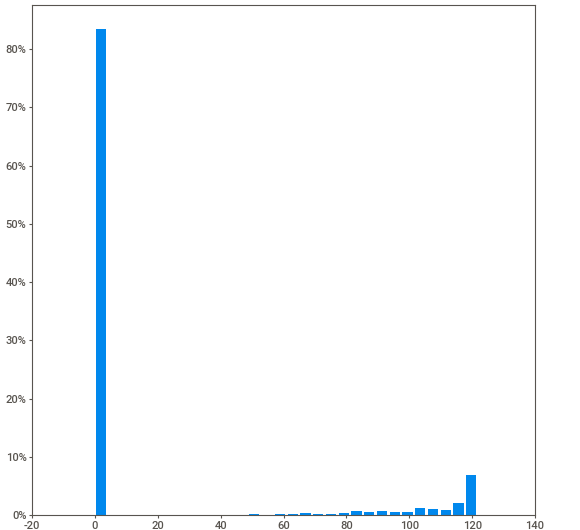
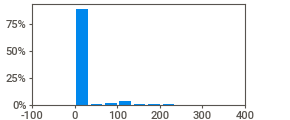
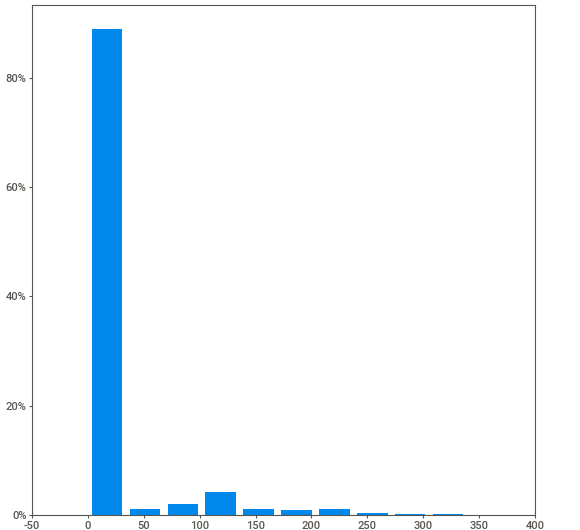
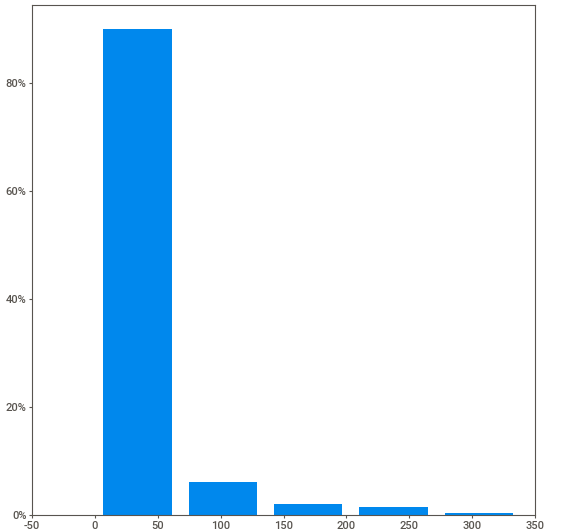
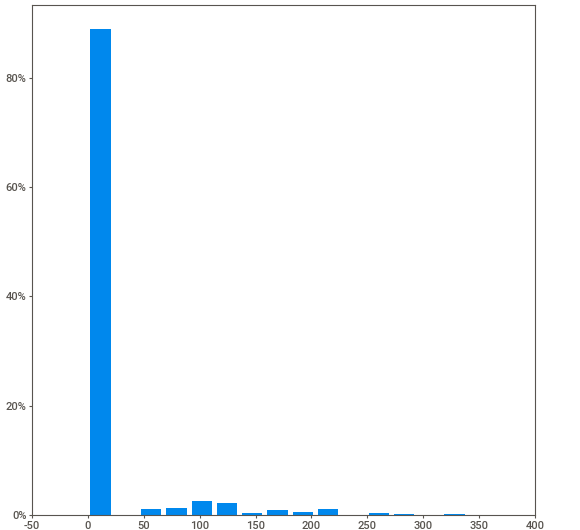
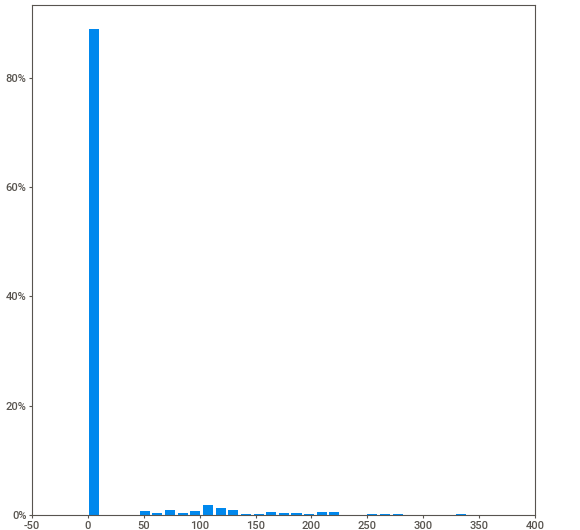
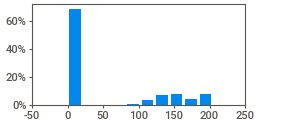
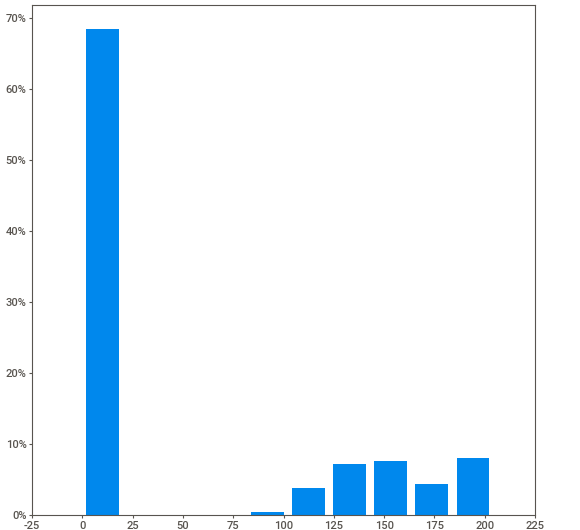
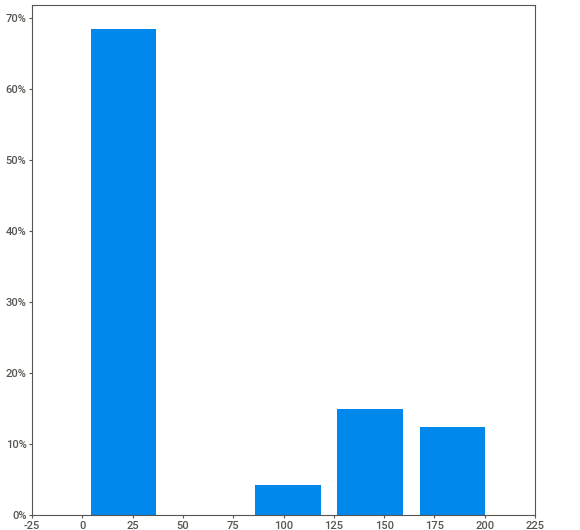
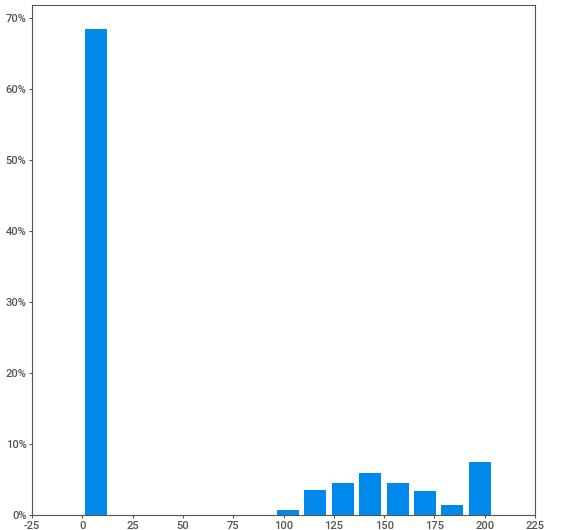
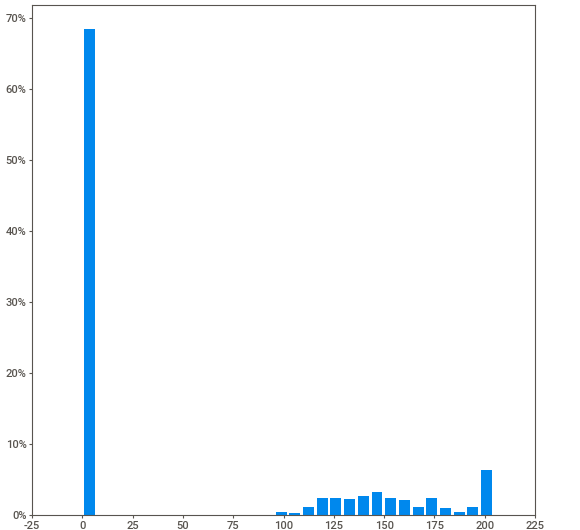
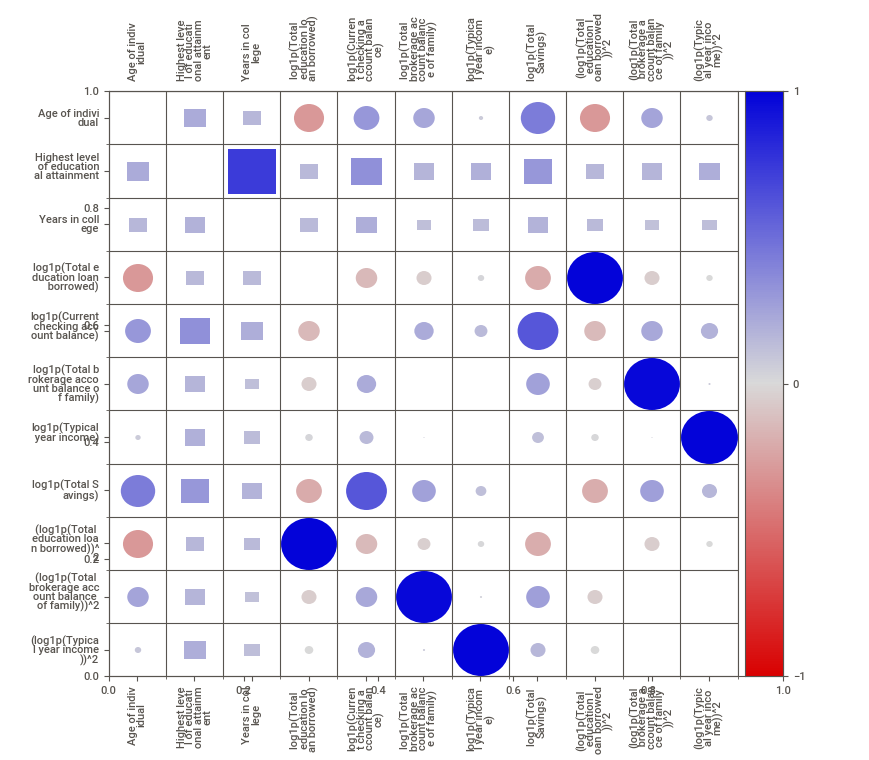
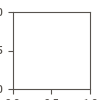

In [22]:
import sweetviz as sv

# Create a Sweetviz report
report = sv.analyze(data_winsorized)

# Display the report in a Jupyter notebook
report.show_notebook()

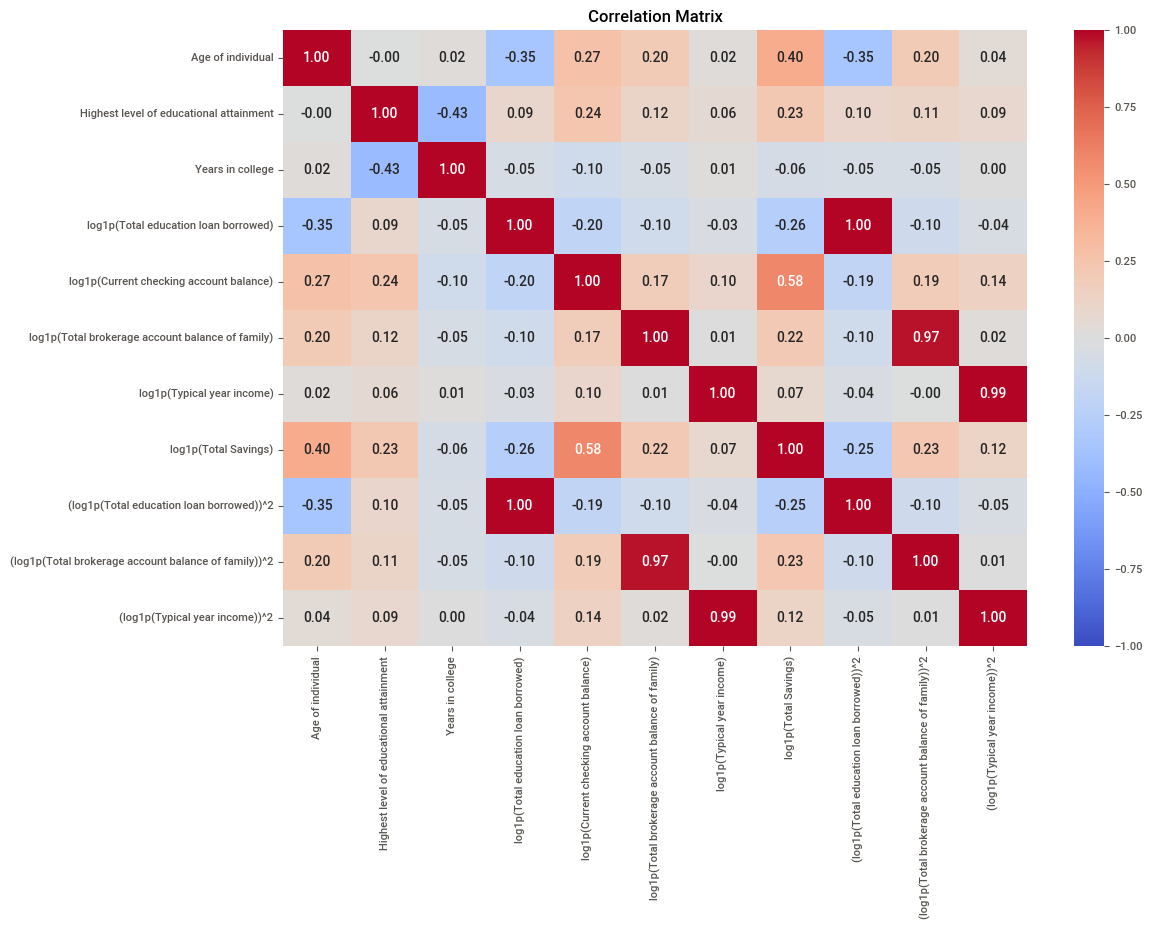

In [23]:
# Compute the correlation matrix
corr_matrix = data_winsorized.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [24]:
numerical_columns = data_winsorized.select_dtypes(include=[np.number]).columns

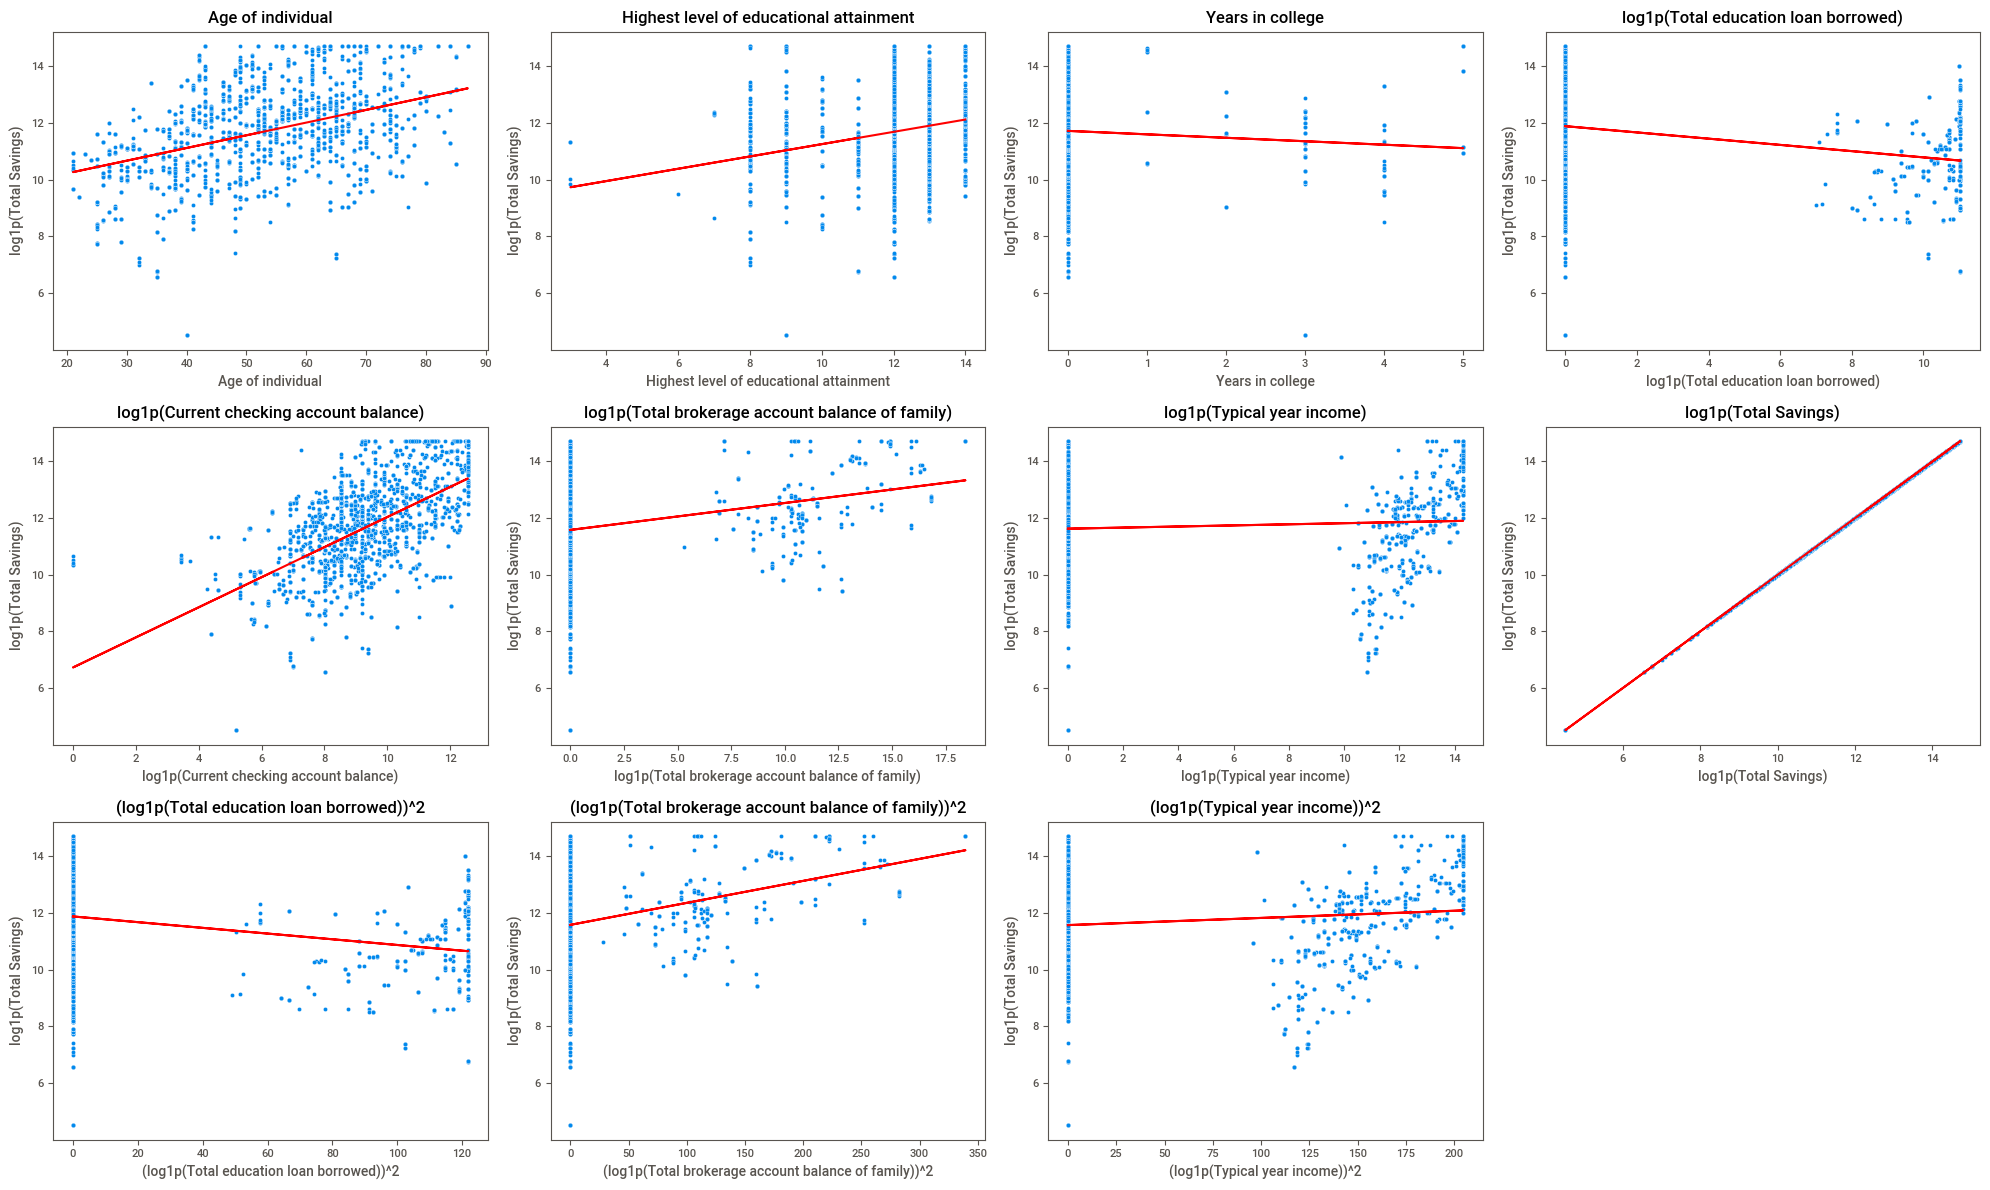

In [25]:
# plot of Total Savings vs all other variables

# Determine the number of rows and columns for subplots
num_plots = len(numerical_columns)
cols = 4  # Number of columns in the grid
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows in the grid

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the columns and plot each one
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=column, y='log1p(Total Savings)', data=data_winsorized, ax=axes[i])
    # regression line
    m, b = np.polyfit(data_winsorized[column], data_winsorized['log1p(Total Savings)'], 1)
    axes[i].plot(data_winsorized[column], m*data_winsorized[column] + b, color='red')
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

### Cluster Analysis

In [26]:
# cluster analysis using PCA
from sklearn.preprocessing import StandardScaler

features = data_winsorized.drop('log1p(Total Savings)', axis=1)
target = data_winsorized['log1p(Total Savings)']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

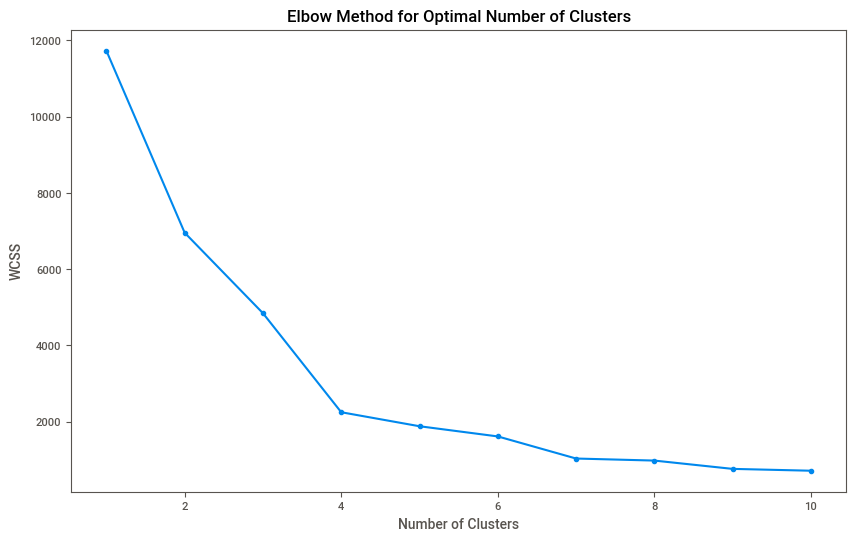

In [28]:
# elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Testing from 1 to 10 clusters
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

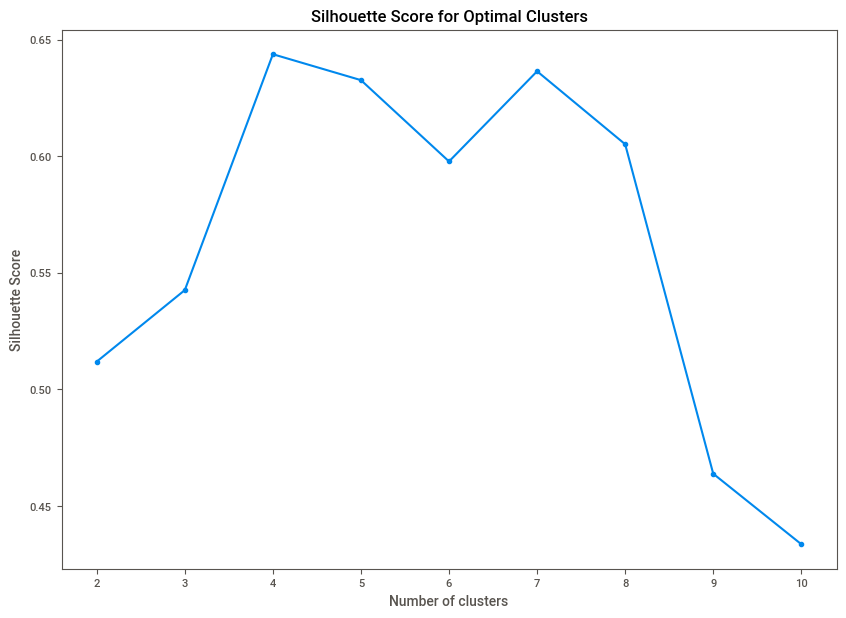

In [29]:
# silhouette score
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

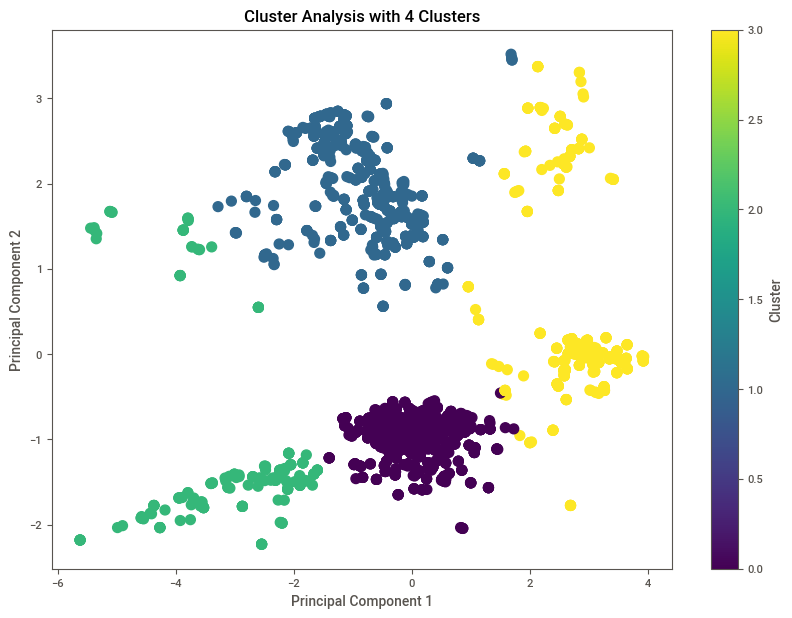

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Cluster Analysis with {optimal_clusters} Clusters')
plt.show()

In [32]:
data_winsorized['Cluster'] = clusters

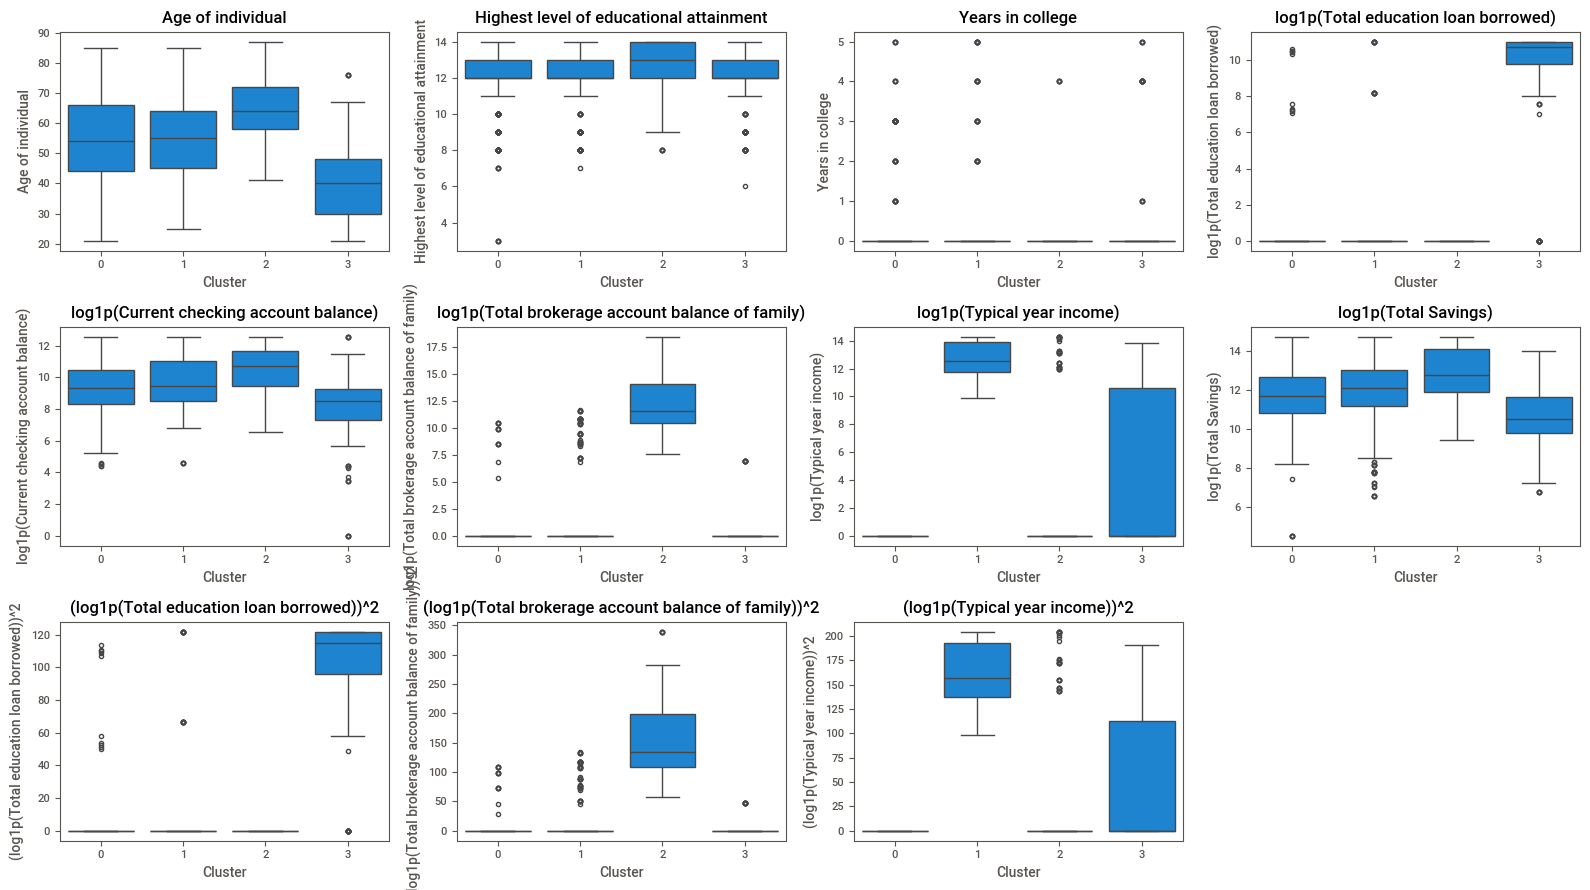

In [33]:
# Determine the number of rows and columns for subplots
num_plots = len(numerical_columns)
cols = 4  # Number of columns in the grid
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows in the grid

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the columns and plot each one
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Cluster', y=column, data=data_winsorized, ax=axes[i])
    axes[i].set_title(f'{column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

---

## Preprocessing

In [34]:
df = pd.read_stata('p22i6.dta')

In [35]:
# rename columns

df = df.rename(columns={
                    "x6551": "Roth IRA balance",
                    "x3730": "Savings account balance",
                    "x8022": "Age of individual",
                    "x7805": "Total education loan borrowed",
                    "x5931": "Highest level of educational attainment",
                    "x3506": "Current checking account balance",
                    "x3930": "Total brokerage account balance of family",
                    "x7362": "Typical year income",
                    "x5933": "Years in college"
                })

In [36]:
cols_to_keep = ['Roth IRA balance', 'Savings account balance', 'Age of individual', 'Total education loan borrowed', 'Highest level of educational attainment', 'Current checking account balance', 'Total brokerage account balance of family', 'Typical year income', 'Years in college']

non_neg_cols = ['Current checking account balance', 'Total brokerage account balance of family'] + ['Roth IRA balance', 'Savings account balance']
positive_cols = ['Roth IRA balance', 'Savings account balance']

ordinal_cols = ['Highest level of educational attainment']

end_cols = ['Highest level of educational attainment', 'log1p(Current checking account balance)', 'log1p(Total Savings)', 'log1p(Total education loan borrowed)', 'log1p(Total brokerage account balance of family)', 'log1p(Total education loan borrowed)^2', 'log1p(Total education loan borrowed)*log1p(Total brokerage account balance of family)','log1p(Total brokerage account balance of family)^2', 'Age of individual', 'Typical year income', 'Years in college']

### Pipeline

In [37]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

def remove_neg(x):
    x_filtered = x.copy()
    x_filtered[non_neg_cols] = x[non_neg_cols].where(x[non_neg_cols] >= 0)
    return x_filtered

def remove_non_pos(x):
    x_filtered = x.copy()
    x_filtered[positive_cols] = x[positive_cols].where(x[positive_cols] > 0)
    return x_filtered

def add_and_drop(X):
    X_transformed = X.copy()
    X_transformed['Total Savings'] = X_transformed['Roth IRA balance'] + X_transformed['Savings account balance']
    X_transformed = X_transformed.drop(columns=['Roth IRA balance', 'Savings account balance'])
    return X_transformed

winsorizer = Winsorizer(capping_method='quantiles', tail='right', fold=0.05, variables=
                             ['Total education loan borrowed', 'Current checking account balance', 
                              'Typical year income', 'Total Savings'])

log1p_transformer = FunctionTransformer(np.log1p, validate=False)
quadratic_featurizer = PolynomialFeatures(degree=2, include_bias=False)

log_square = Pipeline([
    ('log1p', log1p_transformer),
    ('quadratic', quadratic_featurizer),
])

# Custom transformer to convert NumPy array back to DataFrame
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.feature_names)

In [38]:
from sklearn.preprocessing import OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_cols),
        ('log1p', log1p_transformer, ['Current checking account balance', 'Total Savings']),
        ('log_square', log_square, ['Total education loan borrowed', 'Total brokerage account balance of family']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('column_selector', DataFrameSelector(cols_to_keep)),
    ('remove_neg', FunctionTransformer(remove_neg, validate=False)),
    # ('remove_non_pos', FunctionTransformer(remove_non_pos, validate=False)),
    ('remove nan', FunctionTransformer(lambda x: x.dropna(), validate=False)),
    ('add_and_drop', FunctionTransformer(lambda x: add_and_drop(x))),
    ('winsorizer', winsorizer),
    ('preprocessor', preprocessor),
    ('array_to_df', ArrayToDataFrame(end_cols))
])

In [39]:
# fit the pipeline

preprocessed_data = pipeline.fit_transform(df)

/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/feature_engine/outliers/base_outlier.py:87: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[feature] = X[feature].clip(upper=self.right_tail_caps_[feature])


In [40]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22315 entries, 0 to 22314
Data columns (total 11 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Highest level of educational attainment                                                22315 non-null  float64
 1   log1p(Current checking account balance)                                                22315 non-null  float64
 2   log1p(Total Savings)                                                                   22315 non-null  float64
 3   log1p(Total education loan borrowed)                                                   22315 non-null  float64
 4   log1p(Total brokerage account balance of family)                                       22315 non-null  float64
 5   log1p(Total education loan borrowed)^2                                    

In [41]:
preprocessed_data.describe()

,Highest level of educational attainment,log1p(Current checking account balance),log1p(Total Savings),log1p(Total education loan borrowed),log1p(Total brokerage account balance of family),log1p(Total education loan borrowed)^2,log1p(Total education loan borrowed)*log1p(Total brokerage account balance of family),log1p(Total brokerage account balance of family)^2,Age of individual,Typical year income,Years in college
count,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000
mean,10.376652,7.896792,5.816409,1.746239,0.743380,17.718527,0.363249,9.155467,54.706027,64918.299350,0.331436
std,2.798058,2.908295,5.194550,3.830122,2.933128,39.394433,6.036362,38.773106,16.158944,158861.324086,0.956542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,-9.000000,0.000000
25%,8.000000,6.685861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000
50%,12.000000,8.294300,7.313887,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000
75%,12.000000,9.798183,10.596660,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,40000.000000,0.000000
max,14.000000,12.254868,13.320068,10.950824,18.420681,119.920548,137.577531,339.321479,95.000000,647300.000000,5.000000


### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(preprocessed_data, test_size=0.3, random_state=42)

X_train = train.drop(columns=['log1p(Total Savings)'])
y_train = train['log1p(Total Savings)']

X_test = test.drop(columns=['log1p(Total Savings)'])
y_test = test['log1p(Total Savings)']

---

## Modelling

### Choosing Models

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [44]:
models = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42)
]

### Evaluating Models

In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error, r2_score

for model in models:
    pipeline = Pipeline(steps=[
        ('model', model)
        ])
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=kfold)
    print(f'{model.__class__.__name__} RMSE: {root_mean_squared_error(y_train, y_pred)}, R^2: {r2_score(y_train, y_pred)}')

LinearRegression RMSE: 4.559816141669559, R^2: 0.23124597962626248
RandomForestRegressor RMSE: 2.302096833220613, R^2: 0.8040524166595842
DecisionTreeRegressor RMSE: 2.6246601332395456, R^2: 0.7452941697771469


### Model Tuning

In [46]:
# stacking
from mlxtend.regressor import StackingRegressor

# Initialize the base models
model0 = models[0]
model1 = models[1]
model2 = models[2]

# Initialize the meta model
meta_model = LinearRegression()

# Initialize the stacking model
stacking_model = StackingRegressor(regressors=[model0, model1, model2], meta_regressor=meta_model)

pipeline = Pipeline(steps=[('model', stacking_model)])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=kfold)

print(f'Stacking RMSE: {root_mean_squared_error(y_train, y_pred)}, R^2: {r2_score(y_train, y_pred)}')

/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/hpark/Syncthing/Professional/DS_Projects/Pre

Stacking RMSE: 2.6246601332395447, R^2: 0.7452941697771471


/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/hpark/Syncthing/Professional/DS_Projects/Predict_Individual_Savings/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### Error Analysis

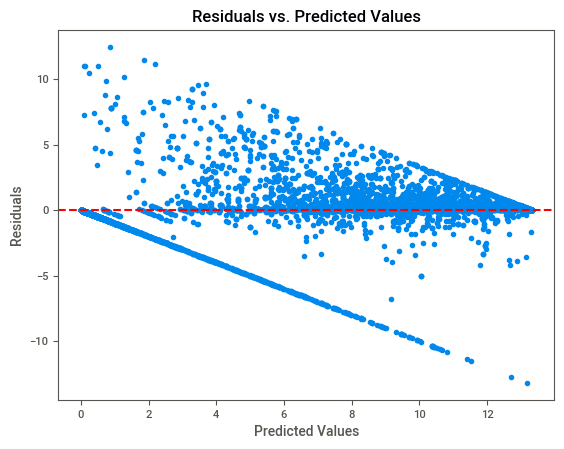

In [47]:
pipeline_dt = Pipeline(steps=[('model', models[1])])

pipeline_dt.fit(X_train, y_train)

y_pred_dt = pipeline_dt.predict(X_test)

residuals = y_test - y_pred_dt

plt.scatter(y_pred_dt, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

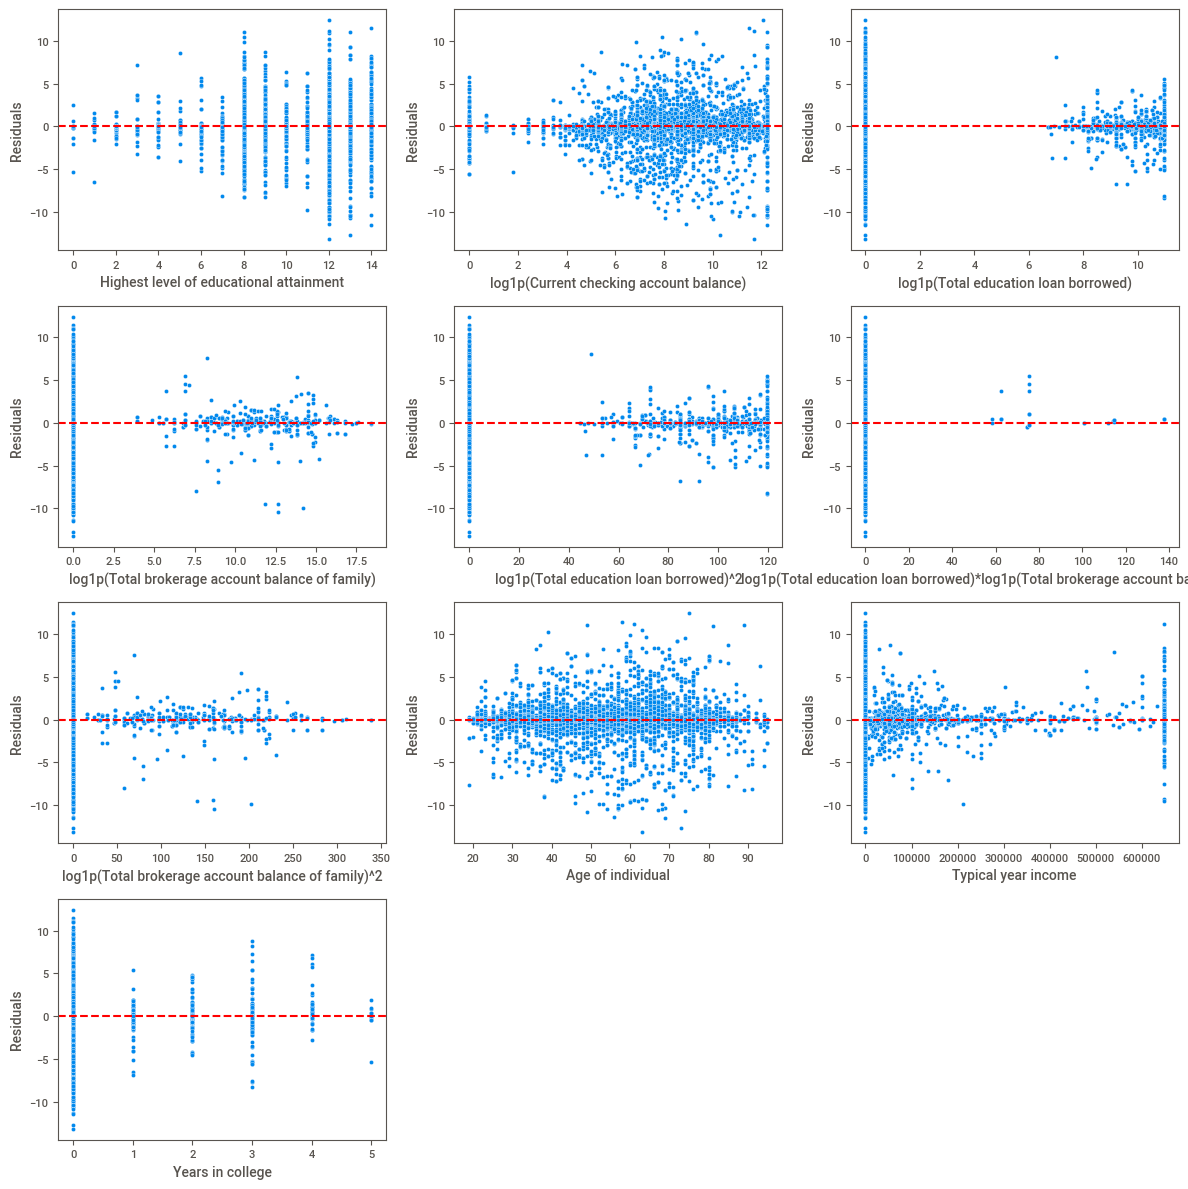

In [48]:
# plot residual against features

# Determine the number of rows and columns for subplots
num_plots = len(X_test.columns)
cols = 3  # Number of columns in the grid
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows in the grid

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, col in enumerate(X_test.columns):
    sns.scatterplot(x=X_test[col], y=residuals, ax=axes[i])
    axes[i].axhline(y=0, color='r', linestyle='--')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuals')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

### Feature Importance

In [50]:
pipeline = Pipeline(steps=[('model', models[1])])

p = pipeline.fit(X_train, y_train)

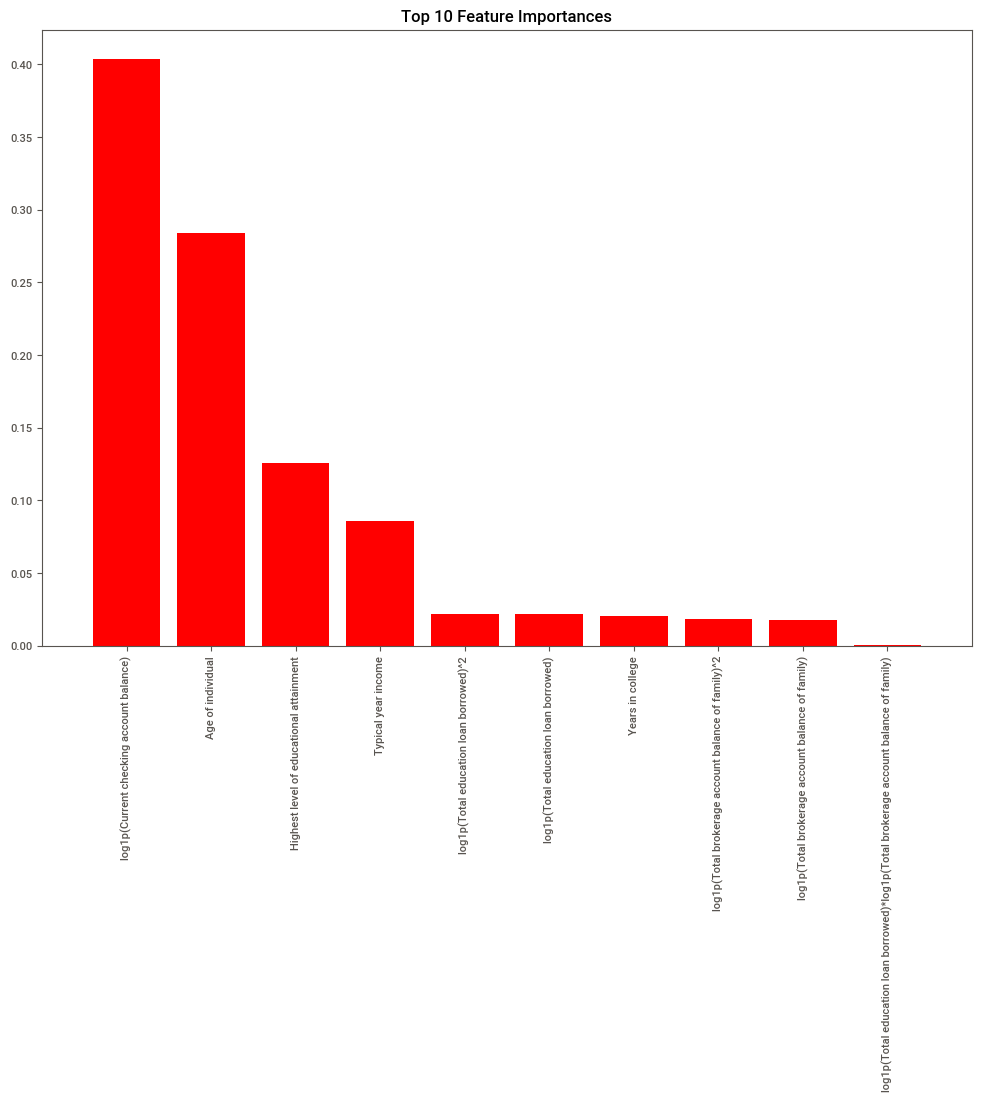

In [57]:
fitted_model = p.named_steps['model']

importances = fitted_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_n = 10
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_feature_names = np.array(X_test.columns)[top_indices]

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), top_importances, color="r", align="center")
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.xlim([-1, top_n])
plt.show()

## Conclusion

### Summary of Findings:
- **Key Results**: In this project, we successfully analyzed the relationships between various demographic and financial variables (age, education, and finances) and individual savings potential. Our analysis revealed that **Random Forest** was the most effective model in predicting savings, outperforming other models based on error metrics like RMSE and R^2. The feature importance analysis showed that **checking account balance** and **age** were the strongest predictors of savings.
  
- **Trends and Patterns**: The **correlation matrix** indicated a decently positive relationship between checking account balance and savings, while variables like income showed weaker correlations. The **cluster analysis** highlighted distinct groups of individuals but all showed similar savings behaviors. Additionally, the **residuals vs predicted values plot** showed some bounded negative sloping pattern, suggesting potential room for model improvement.

### Implications:
- **Impact**: These findings offer valuable insights into the financial behavior of individuals, especially how age impact savings potential but income does not. These findings can help financial institutions better understand savings behavior across age groups and create tailored financial products, such as savings plans for younger individuals or high-interest accounts for those with larger balances.

- **Applications**: The savings prediction model can be applied to identify individuals at risk of low savings and offer interventions to improve their financial health. Companies can also use these insights for better marketing strategies by identifying potential high-value customers.

### Limitations:
- **Constraints**: One limitation of the analysis is the presence of a large number of **outliers** and **high variability** in the dataset, which may skew the results or reduce model accuracy. Additionally, key behavioral variables, such as **spending habits** and **risk tolerance**, were not included, potentially limiting the model's ability to fully capture the factors influencing savings behavior.

- **Impact of Limitations**: These limitations may reduce the generalizability of the model, especially when predicting savings behavior for individuals with non-traditional financial profiles (e.g., freelancers or gig workers). The high variance in the dataset could complicate the analysis by making it harder to identify clear patterns, and may also contribute to the model’s difficulty in making accurate predictions.

### Future Work:
- **Recommendations**: Future work could involve integrating additional features related to **spending behavior** or **risk preferences** to improve the model’s performance. Additionally, further feature engineering could be performed to enhance the model's ability to capture the factors influencing savings behavior.

- **Improvements**: Future research should consider implementing a **panel analysis** to track changes in savings behavior over time, providing insights into how life events (such as job changes, marriage, or retirement) affect individual savings potential. Additionally, establishing a process for **regularly updating the model** with new data will help maintain its relevance and accuracy, allowing for periodic retraining to account for shifts in economic conditions and evolving consumer behaviors.